#WASSA 2022

##Packages

In [1]:
#BERT
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.7 MB/s eta 0:00:00


In [2]:
#Load data
import pandas as pd

#Preprocessing
import string
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

#Tokens
from nltk.tokenize import word_tokenize

#Labels
from sklearn.preprocessing import LabelEncoder

#Train/test/val split¶
from sklearn.model_selection import train_test_split

#Vectorization
import tensorflow as tf
from transformers import DistilBertTokenizerFast

#BERT
from transformers import TFDistilBertForSequenceClassification

#Evaluation
import numpy as np
from sklearn.metrics import classification_report

#RoBERTa
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification

#DeBERTa
from transformers import AutoTokenizer, TFDebertaForSequenceClassification

#SVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Random prediction
import random

#TF-iDF
from sklearn.feature_extraction.text import TfidfVectorizer

#pre-trained BERT
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#NN
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

#Correlations
from scipy.stats import pearsonr

#Wilcoxon
from scipy import stats

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Connect to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load data

In [4]:
df_messages = pd.read_csv('/content/drive/MyDrive/messages_train_ready_for_WS.csv')
df_messages

,message_id,response_id,article_id,empathy,distress,empathy_bin,distress_bin,essay,emotion,gender,...,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,R_1hGrPtWM4SumG0U_1,R_1hGrPtWM4SumG0U,67,5.667.000.000.000.000,4.375,1,1,it is really diheartening to read about these ...,sadness,1,...,50000,6.0,5.0,5.0,5.5,5.5,3.571,2.0,3.429,4.0
1,R_1hGrPtWM4SumG0U_2,R_1hGrPtWM4SumG0U,86,4.833,4.875,1,1,the phone lines from the suicide prevention li...,sadness,1,...,50000,6.0,5.0,5.0,5.5,5.5,3.571,2.0,3.429,4.0
2,R_1hGrPtWM4SumG0U_3,R_1hGrPtWM4SumG0U,206,5.332.999.999.999.990,3.500,1,0,"no matter what your heritage, you should be ab...",neutral,1,...,50000,6.0,5.0,5.0,5.5,5.5,3.571,2.0,3.429,4.0
3,R_1hGrPtWM4SumG0U_4,R_1hGrPtWM4SumG0U,290,4.167,5.250,1,1,it is frightening to learn about all these sha...,fear,1,...,50000,6.0,5.0,5.0,5.5,5.5,3.571,2.0,3.429,4.0
4,R_1hGrPtWM4SumG0U_5,R_1hGrPtWM4SumG0U,342,5.332.999.999.999.990,4.625,1,1,the eldest generation of russians aren't being...,sadness,1,...,50000,6.0,5.0,5.0,5.5,5.5,3.571,2.0,3.429,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,R_DHy2Rcz9Hym8jgl_1,R_DHy2Rcz9Hym8jgl,16,1.0,1.000,0,0,"These days, women are winning in sports. There...",joy,2,...,30000,7.0,7.0,7.0,7.0,7.0,5.0,1.286,42.860.000.000.000.000,4.428.999.999.999.990
1856,R_DHy2Rcz9Hym8jgl_2,R_DHy2Rcz9Hym8jgl,158,1.0,1.000,0,0,I hate ISIS. They are a group full of hate and...,anger,2,...,30000,7.0,7.0,7.0,7.0,7.0,5.0,1.286,42.860.000.000.000.000,4.428.999.999.999.990
1857,R_DHy2Rcz9Hym8jgl_3,R_DHy2Rcz9Hym8jgl,203,1.0,1.000,0,0,This is just disgusting. I cannot believe that...,disgust,2,...,30000,7.0,7.0,7.0,7.0,7.0,5.0,1.286,42.860.000.000.000.000,4.428.999.999.999.990
1858,R_DHy2Rcz9Hym8jgl_4,R_DHy2Rcz9Hym8jgl,253,1.0,1.000,0,0,I feel like the world is so corrupt that it no...,sadness,2,...,30000,7.0,7.0,7.0,7.0,7.0,5.0,1.286,42.860.000.000.000.000,4.428.999.999.999.990


##Data exploration

In [ ]:
#Number of occurences of essays
print(df_messages['essay'].value_counts())

#Explore essay that appears twice
matching_rows = df_messages[df_messages['essay'] == "I am shocked and saddened by this earthquake. What a sad and terrible tragedy. I feel so sorry for all the victims and those affected by this event. I can't even imagine how devastating this must be for them. What an incredible catastrophe. My thoughts and prayers and best wishes go out for all the many people affected by this tragic catastrophe. I hope that everyone stays safe for the foreseeable future. I am still in shock."]
print(matching_rows)

I am shocked and saddened by this earthquake. What a sad and terrible tragedy. I feel so sorry for all the victims and those affected by this event. I can't even imagine how devastating this must be for them. What an incredible catastrophe. My thoughts and prayers and best wishes go out for all the many people affected by this tragic catastrophe. I hope that everyone stays safe for the foreseeable future. I am still in shock.                                                                                                                                                                                                                                                                                                                                                                                       2
it is really diheartening to read about these immigrants from this article who drowned.  it makes me feel anxious and upset how the whole ordeal happened.  it is a terrible occurrence that this 

In [ ]:
#Characteristics of columns
print(df_messages.info())
print(df_messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   message_id                     1860 non-null   object 
 1   response_id                    1860 non-null   object 
 2   article_id                     1860 non-null   int64  
 3   empathy                        1860 non-null   object 
 4   distress                       1860 non-null   float64
 5   empathy_bin                    1860 non-null   int64  
 6   distress_bin                   1860 non-null   int64  
 7   essay                          1860 non-null   object 
 8   emotion                        1860 non-null   object 
 9   gender                         1860 non-null   int64  
 10  education                      1860 non-null   int64  
 11  race                           1860 non-null   int64  
 12  age                            1860 non-null   i

<ipython-input-11-408d9cb2257a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')


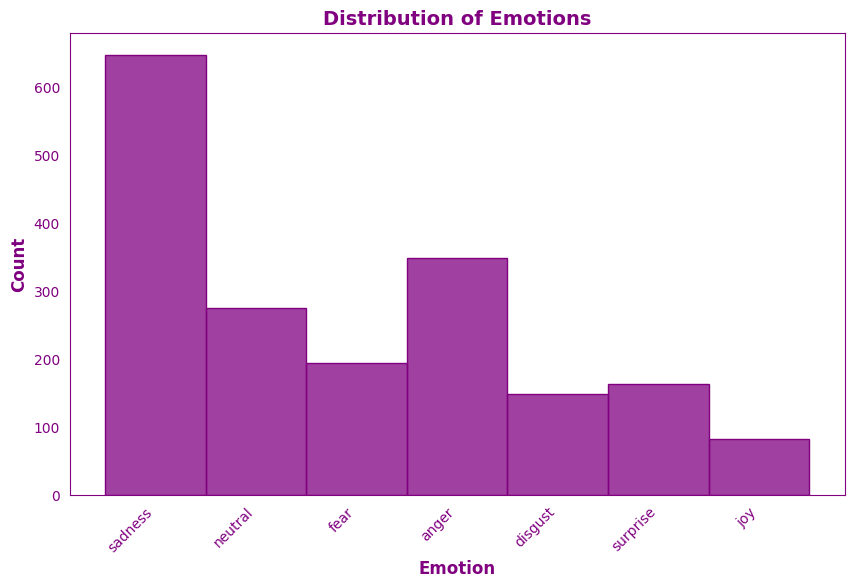

In [ ]:
#Distibution of emotion
plt.figure(figsize=(10, 6))  #figure size
sns.set_style("white")  #style to white

#Customization
histplot = sns.histplot(data=df_messages, x='emotion', color='purple', edgecolor='purple')

histplot.set_xlabel('Emotion', fontsize=12, fontweight='bold', color='purple')
histplot.set_ylabel('Count', fontsize=12, fontweight='bold', color='purple')
histplot.set_title('Distribution of Emotions', fontsize=14, fontweight='bold', color='purple')

histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')

histplot.tick_params(axis='both', colors='purple')
histplot.spines['bottom'].set_color('purple')
histplot.spines['left'].set_color('purple')
histplot.spines['right'].set_color('purple')
histplot.spines['top'].set_color('purple')

histplot.grid(False)

plt.show()

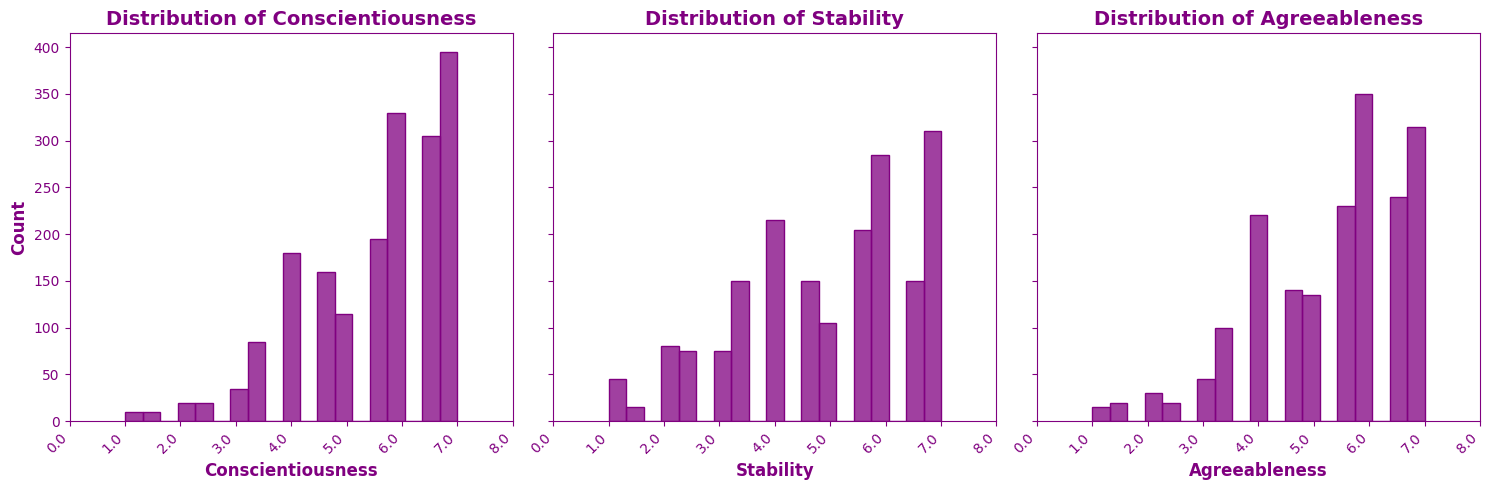

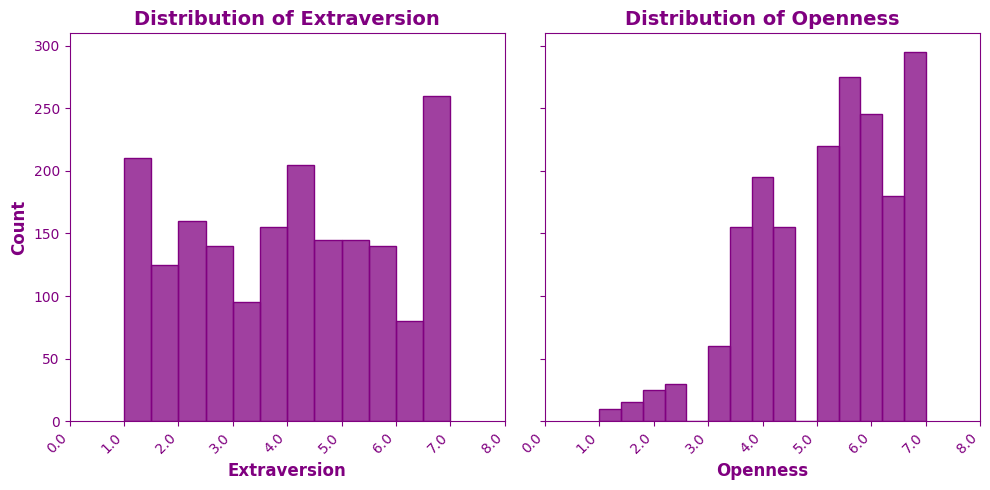

In [14]:
#Distributions of Conscientiousness, Stability, and Agreeableness
fig1, axes1 = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

axes1 = axes1.flatten()

variables1 = ['personality_conscientiousness', 'personality_stability', 'personality_agreeableness']
titles1 = ['Conscientiousness', 'Stability', 'Agreeableness']

for i, variable in enumerate(variables1):
    ax = axes1[i]
    histplot = sns.histplot(data=df_messages, x=variable, color='purple', edgecolor='purple', ax=ax)
    histplot.set_xlabel(titles1[i], fontsize=12, fontweight='bold', color='purple')
    histplot.set_ylabel('Count', fontsize=12, fontweight='bold', color='purple')
    histplot.set_title('Distribution of ' + titles1[i], fontsize=14, fontweight='bold', color='purple')
    histplot.tick_params(axis='both', colors='purple')
    histplot.spines['bottom'].set_color('purple')
    histplot.spines['left'].set_color('purple')
    histplot.spines['right'].set_color('purple')
    histplot.spines['top'].set_color('purple')
    histplot.grid(False)

    x_ticks = histplot.get_xticks()
    x_ticklabels = ['{:.1f}'.format(x) for x in x_ticks]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels, rotation=45, ha='right', fontsize=10, color='purple')

plt.tight_layout()

plt.show()

#Distributions for Extraversion and Openness
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axes2 = axes2.flatten()

variables2 = ['personality_extraversion', 'personality_openess']
titles2 = ['Extraversion', 'Openness']

for i, variable in enumerate(variables2):
    ax = axes2[i]
    histplot = sns.histplot(data=df_messages, x=variable, color='purple', edgecolor='purple', ax=ax)
    histplot.set_xlabel(titles2[i], fontsize=12, fontweight='bold', color='purple')
    histplot.set_ylabel('Count', fontsize=12, fontweight='bold', color='purple')
    histplot.set_title('Distribution of ' + titles2[i], fontsize=14, fontweight='bold', color='purple')
    histplot.tick_params(axis='both', colors='purple')
    histplot.spines['bottom'].set_color('purple')
    histplot.spines['left'].set_color('purple')
    histplot.spines['right'].set_color('purple')
    histplot.spines['top'].set_color('purple')
    histplot.grid(False)

    x_ticks = histplot.get_xticks()
    x_ticklabels = ['{:.1f}'.format(x) for x in x_ticks]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels, rotation=45, ha='right', fontsize=10, color='purple')

plt.tight_layout()

plt.show()

In [ ]:
#Exploration of tokens
df_messages['tokens'] = df_messages['essay'].apply(word_tokenize)

df_messages['token_count'] = df_messages['tokens'].apply(len)

max_tokens = np.max(df_messages['token_count'])
min_tokens = np.min(df_messages['token_count'])
mean_tokens = np.mean(df_messages['token_count'])

print("Max Tokens:", max_tokens)
print("Min Tokens:", min_tokens)
print("Mean Tokens:", mean_tokens)

Max Tokens: 189
Min Tokens: 49
Mean Tokens: 91.64408602150537


##Preprocessing emotion and personality columns

In [ ]:
#Round column values to nearest integer -1
df_messages['personality_conscientiousness2'] = np.floor(df_messages['personality_conscientiousness'])-1
df_messages['personality_openess2'] = np.floor(df_messages['personality_openess'])-1
df_messages['personality_extraversion2'] = np.floor(df_messages['personality_extraversion'])-1
df_messages['personality_agreeableness2'] = np.floor(df_messages['personality_agreeableness'])-1
df_messages['personality_stability2'] = np.floor(df_messages['personality_stability'])-1

In [ ]:
#Encoding emotion column
label_encoder = LabelEncoder()
label_encoder.fit(df_messages['emotion'])
df_messages['encoded_emotion'] = label_encoder.transform(df_messages['emotion'])

In [ ]:
#Prepare emotions for correlations  from annotated data
df_messages['Sadness'] = np.where(df_messages['emotion'] == 'sadness', 1, 0)
df_messages['Joy'] = np.where(df_messages['emotion'] == 'joy', 1, 0)
df_messages['Neutral'] = np.where(df_messages['emotion'] == 'neutral', 1, 0)
df_messages['Fear'] = np.where(df_messages['emotion'] == 'fear', 1, 0)
df_messages['Anger'] = np.where(df_messages['emotion'] == 'anger', 1, 0)
df_messages['Disgust'] = np.where(df_messages['emotion'] == 'disgust', 1, 0)
df_messages['Surprise'] = np.where(df_messages['emotion'] == 'surprise', 1, 0)
df_messages


,message_id,response_id,article_id,empathy,distress,empathy_bin,distress_bin,essay,emotion,gender,...,personality_agreeableness2,personality_stability2,encoded_emotion,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,R_1hGrPtWM4SumG0U_1,R_1hGrPtWM4SumG0U,67,5.667.000.000.000.000,4.375,1,1,it is really diheartening to read about these ...,sadness,1,...,4.0,4.0,5,1,0,0,0,0,0,0
1,R_1hGrPtWM4SumG0U_2,R_1hGrPtWM4SumG0U,86,4.833,4.875,1,1,the phone lines from the suicide prevention li...,sadness,1,...,4.0,4.0,5,1,0,0,0,0,0,0
2,R_1hGrPtWM4SumG0U_3,R_1hGrPtWM4SumG0U,206,5.332.999.999.999.990,3.500,1,0,"no matter what your heritage, you should be ab...",neutral,1,...,4.0,4.0,4,0,0,1,0,0,0,0
3,R_1hGrPtWM4SumG0U_4,R_1hGrPtWM4SumG0U,290,4.167,5.250,1,1,it is frightening to learn about all these sha...,fear,1,...,4.0,4.0,2,0,0,0,1,0,0,0
4,R_1hGrPtWM4SumG0U_5,R_1hGrPtWM4SumG0U,342,5.332.999.999.999.990,4.625,1,1,the eldest generation of russians aren't being...,sadness,1,...,4.0,4.0,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,R_DHy2Rcz9Hym8jgl_1,R_DHy2Rcz9Hym8jgl,16,1.0,1.000,0,0,"These days, women are winning in sports. There...",joy,2,...,6.0,6.0,3,0,1,0,0,0,0,0
1856,R_DHy2Rcz9Hym8jgl_2,R_DHy2Rcz9Hym8jgl,158,1.0,1.000,0,0,I hate ISIS. They are a group full of hate and...,anger,2,...,6.0,6.0,0,0,0,0,0,1,0,0
1857,R_DHy2Rcz9Hym8jgl_3,R_DHy2Rcz9Hym8jgl,203,1.0,1.000,0,0,This is just disgusting. I cannot believe that...,disgust,2,...,6.0,6.0,1,0,0,0,0,0,1,0
1858,R_DHy2Rcz9Hym8jgl_4,R_DHy2Rcz9Hym8jgl,253,1.0,1.000,0,0,I feel like the world is so corrupt that it no...,sadness,2,...,6.0,6.0,5,1,0,0,0,0,0,0


In [ ]:
#Train/test/val sets
random.seed(10)

X = list(df_messages.essay.values) #essays
y = list(df_messages.encoded_emotion.values)
y_con = list(df_messages.personality_conscientiousness2.values)
y_op = list(df_messages.personality_openess2.values)
y_ex = list(df_messages.personality_extraversion2.values)
y_st = list(df_messages.personality_stability2.values)
y_ag = list(df_messages.personality_agreeableness2.values)
emotion_labels = ['anger', 'disgust','fear', 'joy', 'neutral', 'sadness', 'surprise']
personality_labels = ['1','2','3','4','5','6','7']

X_train_val, X_test, y_train_val, y_test, y_con_train_val, y_con_test, y_op_train_val, y_op_test, y_ex_train_val, y_ex_test, y_st_train_val, y_st_test, y_ag_train_val, y_ag_test = train_test_split(X, y, y_con, y_op, y_ex, y_st, y_ag, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val, y_con_train, y_con_val, y_op_train, y_op_val, y_ex_train, y_ex_val, y_st_train, y_st_val, y_ag_train, y_ag_val= train_test_split(X_train_val, y_train_val, y_con_train_val, y_op_train_val, y_ex_train_val, y_st_train_val, y_ag_train_val, test_size=0.1, random_state=1)

In [ ]:
#Create dataframes
WASSA_train = pd.DataFrame({
    'Essay': X_train,
    'Emotion': y_train,
    'Conscientiousness': y_con_train,
    'Openness': y_op_train,
    'Extraversion': y_ex_train,
    'Stability': y_st_train,
    'Agreeableness': y_ag_train
})

WASSA_val = pd.DataFrame({
    'Essay': X_val,
    'Emotion': y_val,
    'Conscientiousness': y_con_val,
    'Openness': y_op_val,
    'Extraversion': y_ex_val,
    'Stability': y_st_val,
    'Agreeableness': y_ag_val
})

WASSA_test = pd.DataFrame({
    'Essay': X_test,
    'Emotion': y_test,
    'Conscientiousness': y_con_test,
    'Openness': y_op_test,
    'Extraversion': y_ex_test,
    'Stability': y_st_test,
    'Agreeableness': y_ag_test
})

#From encodings to values
emotion_mapping = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'joy',
    4: 'neutral',
    4: 'sadness',
    5: 'surprise'
}

openness_mapping = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

conscientiousness_mapping = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

extraversion_mapping = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

stability_mapping = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

agreeableness_mapping = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

WASSA_train['Emotion'] = WASSA_train['Emotion'].map(emotion_mapping)
WASSA_val['Emotion'] = WASSA_val['Emotion'].map(emotion_mapping)
WASSA_test['Emotion'] = WASSA_test['Emotion'].map(emotion_mapping)

WASSA_train['Openness'] = WASSA_train['Openness'].map(openness_mapping)
WASSA_val['Openness'] = WASSA_val['Openness'].map(openness_mapping)
WASSA_test['Openness'] = WASSA_test['Openness'].map(openness_mapping)

WASSA_train['Conscientiousness'] = WASSA_train['Conscientiousness'].map(conscientiousness_mapping)
WASSA_val['Conscientiousness'] = WASSA_val['Conscientiousness'].map(conscientiousness_mapping)
WASSA_test['Conscientiousness'] = WASSA_test['Conscientiousness'].map(conscientiousness_mapping)

WASSA_train['Extraversion'] = WASSA_train['Extraversion'].map(extraversion_mapping)
WASSA_val['Extraversion'] = WASSA_val['Extraversion'].map(extraversion_mapping)
WASSA_test['Extraversion'] = WASSA_test['Extraversion'].map(extraversion_mapping)

WASSA_train['Stability'] = WASSA_train['Stability'].map(stability_mapping)
WASSA_val['Stability'] = WASSA_val['Stability'].map(stability_mapping)
WASSA_test['Stability'] = WASSA_test['Stability'].map(stability_mapping)

WASSA_train['Agreeableness'] = WASSA_train['Agreeableness'].map(agreeableness_mapping)
WASSA_val['Agreeableness'] = WASSA_val['Agreeableness'].map(agreeableness_mapping)
WASSA_test['Agreeableness'] = WASSA_test['Agreeableness'].map(agreeableness_mapping)


In [ ]:
WASSA_train

,Essay,Emotion,Conscientiousness,Openness,Extraversion,Stability,Agreeableness
0,I thinj it is our responsibility as a first wo...,sadness,4,6,2,7,7
1,My feelings and thoughts regarding the article...,surprise,7,7,5,7,7
2,there was this article about a subject I no no...,sadness,6,6,6,6,7
3,I'm no parent and I completely believe Donald ...,disgust,4,7,4,5,6
4,So i just read this article on gold fish in th...,surprise,6,5,1,5,5
...,...,...,...,...,...,...,...
1334,"So, I was reading recently about how Kenya dep...",sadness,5,6,4,5,6
1335,I feel that these Muslim areas are in dire nee...,surprise,6,6,5,6,6
1336,"Unfortunately, I have a yahoo email account an...",fear,6,5,1,5,6
1337,Hearing about the violence going on over polit...,surprise,7,7,4,6,6


In [ ]:
#Save dataframes
WASSA_train.to_csv('/content/drive/MyDrive/WASSA_train.csv', index=False)
WASSA_val.to_csv('/content/drive/MyDrive/WASSA_val.csv', index=False)
WASSA_test.to_csv('/content/drive/MyDrive/WASSA_test.csv', index=False)

##Emotion prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_be = tokenizer_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_be = tokenizer_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_be = tokenizer_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_be),
    y_train
)).shuffle(1000).batch(16)
val_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_be),
    y_val
)).batch(64)
test_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_be),
    y_test
)).batch(64)

In [ ]:
model_be = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(emotion_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_be.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it fo

In [ ]:
model_be.fit(train_dataset_be,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_be,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 74s 330ms/step - loss: 1.7785 - accuracy: 0.3488 - val_loss: 1.6903 - val_accuracy: 0.3289
Epoch 2/10
84/84 [==============================] - 21s 255ms/step - loss: 1.5473 - accuracy: 0.4347 - val_loss: 1.4980 - val_accuracy: 0.4564
Epoch 3/10
84/84 [==============================] - 20s 243ms/step - loss: 1.3092 - accuracy: 0.5370 - val_loss: 1.4134 - val_accuracy: 0.5235
Epoch 4/10
84/84 [==============================] - 20s 234ms/step - loss: 1.0848 - accuracy: 0.6348 - val_loss: 1.4584 - val_accuracy: 0.5302
Epoch 5/10
84/84 [==============================] - 19s 219ms/step - loss: 0.8897 - accuracy: 0.7087 - val_loss: 1.3892 - val_accuracy: 0.5302
Epoch 6/10
84/84 [==============================] - 19s 227ms/step - loss: 0.6955 - accuracy: 0.7939 - val_loss: 1.4593 - val_accuracy: 0.5168
Epoch 7/10
84/84 [==============================] - 18s 218ms/step - loss: 0.5034 - accuracy: 0.8701 - val_loss: 1.4893 - val_accuracy: 0.5369

In [ ]:
logits_be = model_be.predict(test_dataset_be)
y_be_preds = np.argmax(logits_be[0], axis=1)
print(classification_report(y_test, y_be_preds, target_names=emotion_labels))

6/6 [==============================] - 3s 248ms/step
              precision    recall  f1-score   support

       anger       0.51      0.57      0.54        72
     disgust       0.40      0.07      0.12        29
        fear       0.46      0.44      0.45        36
         joy       0.50      0.10      0.17        20
     neutral       0.45      0.69      0.54        54
     sadness       0.67      0.75      0.71       129
    surprise       0.57      0.38      0.45        32

    accuracy                           0.56       372
   macro avg       0.51      0.43      0.43       372
weighted avg       0.55      0.56      0.53       372



####Save DistilBERT predictions

In [ ]:
#Save binary predictions
df_preds_BERT = pd.DataFrame(y_be_preds)
df_preds_BERT.columns =['y_be_preds']
df_preds_BERT['Essay']=X_test
df_preds_BERT['Sadness'] = np.where(df_preds_BERT['y_be_preds'] == 5, 1, 0)
df_preds_BERT['Joy'] = np.where(df_preds_BERT['y_be_preds'] == 3, 1, 0)
df_preds_BERT['Neutral'] = np.where(df_preds_BERT['y_be_preds'] == 4, 1, 0)
df_preds_BERT['Fear'] = np.where(df_preds_BERT['y_be_preds'] == 2, 1, 0)
df_preds_BERT['Anger'] = np.where(df_preds_BERT['y_be_preds'] == 0, 1, 0)
df_preds_BERT['Disgust'] = np.where(df_preds_BERT['y_be_preds'] == 1, 1, 0)
df_preds_BERT['Surprise'] = np.where(df_preds_BERT['y_be_preds'] == 6, 1, 0)
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0


###RoBERTa

In [ ]:
#Vectorization

tokenizer_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_ro = tokenizer_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ro = tokenizer_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ro = tokenizer_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ro),
    y_train
)).shuffle(1000).batch(16)
val_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ro),
    y_val
)).batch(64)
test_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ro),
    y_test
)).batch(64)

In [ ]:
model_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(emotion_labels))

model_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_ro.fit(train_dataset_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ro,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 125s 535ms/step - loss: 1.7974 - accuracy: 0.3480 - val_loss: 1.7084 - val_accuracy: 0.3758
Epoch 2/10
84/84 [==============================] - 40s 478ms/step - loss: 1.4456 - accuracy: 0.4787 - val_loss: 1.3370 - val_accuracy: 0.5168
Epoch 3/10
84/84 [==============================] - 39s 463ms/step - loss: 1.0880 - accuracy: 0.6303 - val_loss: 1.2580 - val_accuracy: 0.5570
Epoch 4/10
84/84 [==============================] - 37s 440ms/step - loss: 0.8234 - accuracy: 0.7207 - val_loss: 1.2629 - val_accuracy: 0.5973
Epoch 5/10
84/84 [==============================] - 37s 441ms/step - loss: 0.6042 - accuracy: 0.8125 - val_loss: 1.6511 - val_accuracy: 0.5302
Epoch 6/10
84/84 [==============================] - 37s 442ms/step - loss: 0.4349 - accuracy: 0.8701 - val_loss: 1.4879 - val_accuracy: 0.5906


In [ ]:
logits_ro = model_ro.predict(test_dataset_ro)
y_ro_preds = np.argmax(logits_ro[0], axis=1)
print(classification_report(y_test, y_ro_preds,target_names=emotion_labels))

6/6 [==============================] - 6s 500ms/step
              precision    recall  f1-score   support

       anger       0.52      0.76      0.62        72
     disgust       0.20      0.03      0.06        29
        fear       0.62      0.58      0.60        36
         joy       0.50      0.15      0.23        20
     neutral       0.45      0.72      0.56        54
     sadness       0.81      0.71      0.76       129
    surprise       0.61      0.44      0.51        32

    accuracy                           0.60       372
   macro avg       0.53      0.49      0.48       372
weighted avg       0.60      0.60      0.58       372



####Save RoBERTa predictions

In [ ]:
#Save binary predictions
df_preds_RoBERTa = pd.DataFrame(y_ro_preds)
df_preds_RoBERTa.columns =['y_ro_preds']
df_preds_RoBERTa['Essay']=X_test
df_preds_RoBERTa['Sadness'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 5, 1, 0)
df_preds_RoBERTa['Joy'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 3, 1, 0)
df_preds_RoBERTa['Neutral'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 4, 1, 0)
df_preds_RoBERTa['Fear'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 2, 1, 0)
df_preds_RoBERTa['Anger'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 0, 1, 0)
df_preds_RoBERTa['Disgust'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 1, 1, 0)
df_preds_RoBERTa['Surprise'] = np.where(df_preds_RoBERTa['y_ro_preds'] == 6, 1, 0)
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0


###DeBERTa

In [ ]:
#Vectorization
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True,  max_length=128)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(64)

In [ ]:
model = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(emotion_labels))

model.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'pooler', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.fit(train_dataset,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset,
           batch_size=16)

Epoch 1/10


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


84/84 [==============================] - 174s 845ms/step - loss: 1.7405 - accuracy: 0.3398 - val_loss: 1.5139 - val_accuracy: 0.4765
Epoch 2/10
84/84 [==============================] - 58s 691ms/step - loss: 1.2965 - accuracy: 0.5407 - val_loss: 1.3798 - val_accuracy: 0.5570
Epoch 3/10
84/84 [==============================] - 57s 675ms/step - loss: 0.9645 - accuracy: 0.6706 - val_loss: 1.2799 - val_accuracy: 0.5570
Epoch 4/10
84/84 [==============================] - 56s 670ms/step - loss: 0.6832 - accuracy: 0.7909 - val_loss: 1.2971 - val_accuracy: 0.5906
Epoch 5/10
84/84 [==============================] - 54s 648ms/step - loss: 0.4686 - accuracy: 0.8574 - val_loss: 1.3700 - val_accuracy: 0.5772
Epoch 6/10
84/84 [==============================] - 56s 663ms/step - loss: 0.2900 - accuracy: 0.9164 - val_loss: 1.5470 - val_accuracy: 0.5638


In [ ]:
logits = model.predict(test_dataset)
y_de_preds = np.argmax(logits[0], axis=1)
print(classification_report(y_test, y_de_preds, target_names=emotion_labels))

6/6 [==============================] - 11s 582ms/step
              precision    recall  f1-score   support

       anger       0.48      0.72      0.57        72
     disgust       0.31      0.34      0.33        29
        fear       0.67      0.61      0.64        36
         joy       0.50      0.45      0.47        20
     neutral       0.78      0.54      0.64        54
     sadness       0.78      0.74      0.76       129
    surprise       0.60      0.38      0.46        32

    accuracy                           0.62       372
   macro avg       0.59      0.54      0.55       372
weighted avg       0.64      0.62      0.62       372



####Save DeBERTa predictions

In [ ]:
#Save binary predictions
df_preds_DeBERTa = pd.DataFrame(y_de_preds)
df_preds_DeBERTa.columns =['y_de_preds']
df_preds_DeBERTa['Essay']=X_test
df_preds_DeBERTa['Sadness'] = np.where(df_preds_DeBERTa['y_de_preds'] == 5, 1, 0)
df_preds_DeBERTa['Joy'] = np.where(df_preds_DeBERTa['y_de_preds'] == 3, 1, 0)
df_preds_DeBERTa['Neutral'] = np.where(df_preds_DeBERTa['y_de_preds'] == 4, 1, 0)
df_preds_DeBERTa['Fear'] = np.where(df_preds_DeBERTa['y_de_preds'] == 2, 1, 0)
df_preds_DeBERTa['Anger'] = np.where(df_preds_DeBERTa['y_de_preds'] == 0, 1, 0)
df_preds_DeBERTa['Disgust'] = np.where(df_preds_DeBERTa['y_de_preds'] == 1, 1, 0)
df_preds_DeBERTa['Surprise'] = np.where(df_preds_DeBERTa['y_de_preds'] == 6, 1, 0)
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_test))]
y_test_int = [int(label) for label in y_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int, target_names=emotion_labels))

Random Classifier as a reference point
              precision    recall  f1-score   support

       anger       0.16      0.12      0.14        72
     disgust       0.10      0.17      0.13        29
        fear       0.07      0.11      0.08        36
         joy       0.04      0.10      0.06        20
     neutral       0.05      0.06      0.05        54
     sadness       0.36      0.16      0.22       129
    surprise       0.06      0.09      0.07        32

    accuracy                           0.12       372
   macro avg       0.12      0.12      0.11       372
weighted avg       0.19      0.12      0.14       372



##Conscientiousness prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_con_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_con_be = tokenizer_con_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_con_be = tokenizer_con_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_con_be = tokenizer_con_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_con2 = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_con_be),
    y_con_train
)).shuffle(1000).batch(16)
val_dataset_con2 = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_con_be),
    y_con_val
)).batch(64)
test_dataset_con2 = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_con_be),
    y_con_test
)).batch(64)

In [ ]:
model2 = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(personality_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_77', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use it fo

In [ ]:
model2.fit(train_dataset_con2,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_con2,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 64s 287ms/step - loss: 1.7239 - accuracy: 0.3264 - val_loss: 1.6163 - val_accuracy: 0.3423
Epoch 2/10
84/84 [==============================] - 21s 253ms/step - loss: 1.6211 - accuracy: 0.3301 - val_loss: 1.6042 - val_accuracy: 0.3423
Epoch 3/10
84/84 [==============================] - 20s 240ms/step - loss: 1.5945 - accuracy: 0.3398 - val_loss: 1.5865 - val_accuracy: 0.3557
Epoch 4/10
84/84 [==============================] - 20s 241ms/step - loss: 1.5401 - accuracy: 0.3704 - val_loss: 1.5830 - val_accuracy: 0.3356
Epoch 5/10
84/84 [==============================] - 19s 224ms/step - loss: 1.4549 - accuracy: 0.4369 - val_loss: 1.5867 - val_accuracy: 0.3691
Epoch 6/10
84/84 [==============================] - 19s 222ms/step - loss: 1.2724 - accuracy: 0.5564 - val_loss: 1.6420 - val_accuracy: 0.3691
Epoch 7/10
84/84 [==============================] - 19s 227ms/step - loss: 0.9710 - accuracy: 0.6998 - val_loss: 1.8870 - val_accuracy: 0.2953

In [ ]:
logits_con_be = model2.predict(test_dataset_con2)
y_con_be_preds = np.argmax(logits_con_be[0], axis=1)
print(classification_report(y_con_test, y_con_be_preds,target_names=personality_labels))

6/6 [==============================] - 3s 258ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        30
           4       0.43      0.05      0.08        64
           5       0.00      0.00      0.00        58
           6       0.39      0.98      0.56       139
           7       0.31      0.06      0.10        69

    accuracy                           0.38       372
   macro avg       0.16      0.15      0.11       372
weighted avg       0.28      0.38      0.24       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DistilBERT predictions

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_BERT['Conscientiousness'] = y_con_be_preds
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0,5
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0,5
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0,5
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5


###RoBERTa

In [ ]:
#Vectorization

tokenizer_con_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_con_ro = tokenizer_con_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_con_ro = tokenizer_con_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_con_ro = tokenizer_con_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_con_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_con_ro),
    y_con_train
)).shuffle(1000).batch(16)
val_dataset_con_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_con_ro),
    y_con_val
)).batch(64)
test_dataset_con_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_con_ro),
    y_con_test
)).batch(64)

In [ ]:
model_con_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(personality_labels))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_con_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_con_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

In [ ]:
model_con_ro.fit(train_dataset_con_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_con_ro,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 92s 528ms/step - loss: 1.7129 - accuracy: 0.3047 - val_loss: 1.6181 - val_accuracy: 0.3423
Epoch 2/10
84/84 [==============================] - 39s 465ms/step - loss: 1.6269 - accuracy: 0.3346 - val_loss: 1.6129 - val_accuracy: 0.2886
Epoch 3/10
84/84 [==============================] - 38s 450ms/step - loss: 1.6033 - accuracy: 0.3383 - val_loss: 1.6003 - val_accuracy: 0.3423
Epoch 4/10
84/84 [==============================] - 37s 443ms/step - loss: 1.5600 - accuracy: 0.3697 - val_loss: 1.5666 - val_accuracy: 0.3557
Epoch 5/10
84/84 [==============================] - 38s 457ms/step - loss: 1.4928 - accuracy: 0.4100 - val_loss: 1.5852 - val_accuracy: 0.3758
Epoch 6/10
84/84 [==============================] - 38s 456ms/step - loss: 1.3542 - accuracy: 0.4892 - val_loss: 1.6620 - val_accuracy: 0.3221
Epoch 7/10
84/84 [==============================] - 38s 447ms/step - loss: 1.1329 - accuracy: 0.5975 - val_loss: 1.8140 - val_accuracy: 0.2953

In [ ]:
logits_con_ro = model_con_ro.predict(test_dataset_con_ro)
y_con_ro_preds = np.argmax(logits_con_ro[0], axis=1)
print(classification_report(y_con_test, y_con_ro_preds,target_names=personality_labels))

6/6 [==============================] - 6s 511ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        30
           4       0.50      0.16      0.24        64
           5       0.00      0.00      0.00        58
           6       0.41      0.91      0.57       139
           7       0.23      0.14      0.18        69

    accuracy                           0.40       372
   macro avg       0.16      0.17      0.14       372
weighted avg       0.28      0.40      0.29       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_RoBERTa['Conscientiousness'] = y_con_ro_preds
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0,5
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,5
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5


###DeBERTa

In [ ]:
#Vectorization

tokenizer_con_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_con_de = tokenizer_con_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_con_de = tokenizer_con_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_con_de = tokenizer_con_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_con_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_con_de),
    y_con_train
)).shuffle(1000).batch(16)
val_dataset_con_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_con_de),
    y_con_val
)).batch(64)
test_dataset_con_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_con_de),
    y_con_test
)).batch(64)

In [ ]:
model_con_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(personality_labels))

model_con_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_con_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_con_de.fit(train_dataset_con_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_con_de,
           batch_size=16)

Epoch 1/10


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


84/84 [==============================] - 188s 872ms/step - loss: 1.6935 - accuracy: 0.3025 - val_loss: 1.6044 - val_accuracy: 0.3423
Epoch 2/10
84/84 [==============================] - 59s 709ms/step - loss: 1.6007 - accuracy: 0.3353 - val_loss: 1.5854 - val_accuracy: 0.3893
Epoch 3/10
84/84 [==============================] - 59s 700ms/step - loss: 1.5473 - accuracy: 0.3846 - val_loss: 1.5740 - val_accuracy: 0.3960
Epoch 4/10
84/84 [==============================] - 57s 682ms/step - loss: 1.4346 - accuracy: 0.4481 - val_loss: 1.5575 - val_accuracy: 0.3758
Epoch 5/10
84/84 [==============================] - 55s 658ms/step - loss: 1.2704 - accuracy: 0.5258 - val_loss: 1.6150 - val_accuracy: 0.3423
Epoch 6/10
84/84 [==============================] - 55s 654ms/step - loss: 1.0880 - accuracy: 0.6109 - val_loss: 1.6921 - val_accuracy: 0.3557
Epoch 7/10
84/84 [==============================] - 54s 637ms/step - loss: 0.8384 - accuracy: 0.7341 - val_loss: 1.8264 - val_accuracy: 0.3221


In [ ]:
logits_con_de = model_con_de.predict(test_dataset_con_de)
y_con_de_preds = np.argmax(logits_con_de[0], axis=1)
print(classification_report(y_con_test, y_con_de_preds,target_names=personality_labels))

6/6 [==============================] - 12s 578ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        10
           3       0.50      0.03      0.06        30
           4       0.31      0.42      0.36        64
           5       0.15      0.03      0.06        58
           6       0.44      0.67      0.53       139
           7       0.22      0.19      0.20        69

    accuracy                           0.37       372
   macro avg       0.23      0.19      0.17       372
weighted avg       0.32      0.37      0.31       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_DeBERTa['Conscientiousness'] = y_con_de_preds
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0,3
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,6
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,3
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,3
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5


###SVM with raw counts

In [ ]:
#Vectorization
vectorizer_con = CountVectorizer()
X_train_vec_con_svm = vectorizer_con.fit_transform(X_train)
X_val_vec_con_svm = vectorizer_con.transform(X_val)
X_test_vec_con_svm = vectorizer_con.transform(X_test)

In [ ]:
#Model
lin_clf_con = svm.LinearSVC()
lin_clf_con.fit(X_train_vec_con_svm, y_con_train)

y_con_svmr_pred = lin_clf_con.predict(X_test_vec_con_svm)

In [ ]:
print("Linear SVM with raw count of words")
print(classification_report(y_con_test, y_con_svmr_pred,target_names=personality_labels))

Linear SVM with raw count of words
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.10      0.14        10
           3       0.17      0.07      0.10        30
           4       0.17      0.23      0.20        64
           5       0.18      0.17      0.18        58
           6       0.41      0.36      0.38       139
           7       0.23      0.30      0.26        69

    accuracy                           0.27       372
   macro avg       0.20      0.18      0.18       372
weighted avg       0.27      0.27      0.27       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM raw predictions

In [ ]:
df_preds_SVM_raw = pd.DataFrame()
df_preds_SVM_raw['Conscientiousness'] = y_con_svmr_pred
df_preds_SVM_raw['Essay']=X_test
df_preds_SVM_raw.to_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv', index=False)
df_preds_SVM_raw

,Conscientiousness,Essay
0,5.0,The results of the fire could have been worse....
1,6.0,I am thankful that there are people who care a...
2,1.0,"Aww, I hope this story isn't really true. I m..."
3,4.0,I am not sure what to think. I would be happy ...
4,6.0,Wow.. You have to check this out. There was a...
...,...,...
367,3.0,"I'm glad I don't wear contacts, because I'm so..."
368,3.0,It's almost funny because I was looking at som...
369,5.0,Michael Moore to Democrats: I told you Trump w...
370,5.0,I can't believe Wells Fargo would do this in s...


###SVM with TF-iDF

In [ ]:
#Vectorization
tfidf_con = TfidfVectorizer()

X_train_vec_con_svm2 = tfidf_con.fit_transform(X_train)
X_val_vec_con_svm2 = tfidf_con.transform(X_val)
X_test_vec_con_svm2 = tfidf_con.transform(X_test)

In [ ]:
#Model
lin_clf_con_svm2 = svm.LinearSVC()
lin_clf_con_svm2.fit(X_train_vec_con_svm2, y_con_train)

y_con_svm2_pred = lin_clf_con_svm2.predict(X_test_vec_con_svm2)

In [ ]:
print("Linear SVM with TF-iDF")
print(classification_report(y_con_test, y_con_svm2_pred,target_names=personality_labels))

Linear SVM with TF-iDF
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.10      0.18        10
           3       0.33      0.07      0.11        30
           4       0.21      0.23      0.22        64
           5       0.17      0.14      0.15        58
           6       0.40      0.46      0.43       139
           7       0.22      0.28      0.24        69

    accuracy                           0.29       372
   macro avg       0.33      0.18      0.19       372
weighted avg       0.31      0.29      0.28       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM TF-iDF predictions

In [ ]:
df_preds_SVM_TFiDF = pd.DataFrame()
df_preds_SVM_TFiDF['Essay']=X_test
df_preds_SVM_TFiDF['Conscientiousness'] = y_con_svm2_pred
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)
df_preds_SVM_TFiDF

,Essay,Conscientiousness
0,The results of the fire could have been worse....,5.0
1,I am thankful that there are people who care a...,6.0
2,"Aww, I hope this story isn't really true. I m...",4.0
3,I am not sure what to think. I would be happy ...,4.0
4,Wow.. You have to check this out. There was a...,6.0
...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0
368,It's almost funny because I was looking at som...,3.0
369,Michael Moore to Democrats: I told you Trump w...,5.0
370,I can't believe Wells Fargo would do this in s...,5.0


###Logistic regression with raw counts

In [ ]:
#Vectorization
vectorizer_con_log = CountVectorizer()
X_train_vec_con_log = vectorizer_con_log.fit_transform(X_train)
X_val_vec_con_log = vectorizer_con_log.transform(X_val)
X_test_vec_con_log = vectorizer_con_log.transform(X_test)

In [ ]:
#Train the model
lr_con = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_con.fit(X_train_vec_con_log, y_con_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Evaluate performance
y_con_log_pred = lr_con.predict(X_test_vec_con_log)
print("Logistic Regression with raw count of words")
print(classification_report(y_con_test, y_con_log_pred,target_names=personality_labels))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.10      0.18        10
           3       0.25      0.07      0.11        30
           4       0.19      0.23      0.21        64
           5       0.15      0.14      0.14        58
           6       0.42      0.42      0.42       139
           7       0.25      0.32      0.28        69

    accuracy                           0.29       372
   macro avg       0.32      0.18      0.19       372
weighted avg       0.31      0.29      0.28       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. raw predictions

In [ ]:
df_preds_LOG_raw = pd.DataFrame()
df_preds_LOG_raw['Essay']=X_test
df_preds_LOG_raw['Conscientiousness'] = y_con_log_pred
df_preds_LOG_raw.to_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv', index=False)
df_preds_LOG_raw

,Essay,Conscientiousness
0,The results of the fire could have been worse....,5.0
1,I am thankful that there are people who care a...,6.0
2,"Aww, I hope this story isn't really true. I m...",3.0
3,I am not sure what to think. I would be happy ...,4.0
4,Wow.. You have to check this out. There was a...,6.0
...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0
368,It's almost funny because I was looking at som...,3.0
369,Michael Moore to Democrats: I told you Trump w...,5.0
370,I can't believe Wells Fargo would do this in s...,5.0


###Logistic regression with TF-iDF

In [ ]:
#Vectorization
tfidf_con_log = TfidfVectorizer()

X_train_vec_con_log2 = tfidf_con_log.fit_transform(X_train)
X_val_vec_con_log2 = tfidf_con_log.transform(X_val)
X_test_vec_con_log2 = tfidf_con_log.transform(X_test)

In [ ]:
#Train the model
lr_con2 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_con2.fit(X_train_vec_con_log2, y_con_train)

#Evaluate performance
y_con_log2_pred = lr_con2.predict(X_test_vec_con_log2)

print("Logistic Regression with raw count of words")
print(classification_report(y_con_test, y_con_log2_pred,target_names=personality_labels))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        30
           4       0.23      0.11      0.15        64
           5       0.29      0.03      0.06        58
           6       0.38      0.78      0.51       139
           7       0.22      0.16      0.18        69

    accuracy                           0.34       372
   macro avg       0.16      0.15      0.13       372
weighted avg       0.27      0.34      0.26       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. TF-iDF predictions

In [ ]:
df_preds_LOG_TFiDF = pd.DataFrame()
df_preds_LOG_TFiDF['Essay']=X_test
df_preds_LOG_TFiDF['Conscientiousness'] = y_con_log2_pred
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_LOG_TFiDF

,Essay,Conscientiousness
0,The results of the fire could have been worse....,5.0
1,I am thankful that there are people who care a...,6.0
2,"Aww, I hope this story isn't really true. I m...",5.0
3,I am not sure what to think. I would be happy ...,4.0
4,Wow.. You have to check this out. There was a...,6.0
...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",5.0
368,It's almost funny because I was looking at som...,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0
370,I can't believe Wells Fargo would do this in s...,5.0


###Linear Regression

In [ ]:
#Vectorization
tfidf_lin_con = TfidfVectorizer()
X_train_vec_con_lin = tfidf_lin_con.fit_transform(X_train)
X_val_vec_con_lin = tfidf_lin_con.transform(X_val)
X_test_vec_con_lin = tfidf_lin_con.transform(X_test)

In [ ]:
#Train the model
lr_con5 = LinearRegression()
lr_con5.fit(X_train_vec_con_lin, y_con_train)

LinearRegression()

In [ ]:
#Evaluate performance
y_conlin_pred = lr_con5.predict(X_test_vec_con_lin)
r_squared5 = lr_con5.score(X_test_vec_con_lin, y_con_test)
print("Linear Regression")
print("R-squared: ", r_squared5)

Linear Regression
R-squared:  -0.3379009943045914


###Neural Network

In [ ]:
#Vectorization
tfidf_rnn_con = TfidfVectorizer()
X_train_vec_rnn_con = tfidf_rnn_con.fit_transform(X_train)
X_val_vec_rnn_con = tfidf_rnn_con.transform(X_val)
X_test_vec_rnn_con = tfidf_rnn_con.transform(X_test)

In [ ]:
#Train the MLP model
mlp_con = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp_con.fit(X_train_vec_rnn_con, y_con_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=1)

In [ ]:
y_con_nn_pred = mlp_con.predict(X_test_vec_rnn_con)

#Evaluate performance
r_squared_nn = r2_score(y_con_test, y_con_nn_pred)
print('R-squared:', r_squared_nn)

R-squared: -0.13506956571264728


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_con_test))]
y_test_int = [int(label) for label in y_con_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        10
           2       0.06      0.10      0.08        30
           3       0.23      0.19      0.21        64
           4       0.09      0.09      0.09        58
           5       0.35      0.12      0.18       139
           6       0.19      0.17      0.18        69

    accuracy                           0.13       372
   macro avg       0.13      0.10      0.10       372
weighted avg       0.22      0.13      0.16       372



##Openness prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_op2 = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_op= tokenizer_op2(X_train, truncation=True, padding=True, max_length=128)
test_encodings_op = tokenizer_op2(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_op = tokenizer_op2(X_val, truncation=True, padding=True, max_length=128)

train_dataset2 = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_op),
    y_op_train
)).shuffle(1000).batch(16)
val_dataset2 = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_op),
    y_op_val
)).batch(64)
test_dataset2 = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_op),
    y_op_test
)).batch(64)

In [ ]:
model2_op = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(personality_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model2_op.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_135']
You should probably TRAIN this model on a down-stream task to be able to use it f

In [ ]:
model2_op.fit(train_dataset2,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset2,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 48s 289ms/step - loss: 1.7917 - accuracy: 0.2644 - val_loss: 1.7899 - val_accuracy: 0.2081
Epoch 2/10
84/84 [==============================] - 21s 247ms/step - loss: 1.7005 - accuracy: 0.2830 - val_loss: 1.7570 - val_accuracy: 0.2013
Epoch 3/10
84/84 [==============================] - 19s 230ms/step - loss: 1.6623 - accuracy: 0.3107 - val_loss: 1.7443 - val_accuracy: 0.2215
Epoch 4/10
84/84 [==============================] - 19s 221ms/step - loss: 1.5843 - accuracy: 0.3749 - val_loss: 1.7797 - val_accuracy: 0.2215
Epoch 5/10
84/84 [==============================] - 18s 219ms/step - loss: 1.4472 - accuracy: 0.4698 - val_loss: 1.7772 - val_accuracy: 0.2617
Epoch 6/10
84/84 [==============================] - 18s 219ms/step - loss: 1.2304 - accuracy: 0.5833 - val_loss: 1.9125 - val_accuracy: 0.2282


In [ ]:
logits_op_be = model2_op.predict(test_dataset2)
y_op_be_preds = np.argmax(logits_op_be[0], axis=1)
print(classification_report(y_op_test, y_op_be_preds,target_names=personality_labels))

6/6 [==============================] - 3s 250ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        44
           4       0.28      0.36      0.32        67
           5       0.37      0.75      0.49       106
           6       0.25      0.18      0.21        82
           7       0.22      0.04      0.06        56

    accuracy                           0.33       372
   macro avg       0.16      0.19      0.15       372
weighted avg       0.24      0.33      0.25       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DistilBERT predictions

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_BERT['Openess'] = y_op_be_preds
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0,5,3
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0,5,4
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,4
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0,5,4
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4


###RoBERTa

In [ ]:
#Vectorization

tokenizer = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True,  max_length=128)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset_op = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_op_train
)).shuffle(1000).batch(16)
val_dataset_op = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_op_val
)).batch(64)
test_dataset_op = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_op_test
)).batch(64)

In [ ]:
model_op = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(personality_labels))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_op.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_op.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

In [ ]:
model_op.fit(train_dataset_op,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_op,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 92s 493ms/step - loss: 1.7857 - accuracy: 0.2367 - val_loss: 1.7828 - val_accuracy: 0.2081
Epoch 2/10
84/84 [==============================] - 37s 443ms/step - loss: 1.7017 - accuracy: 0.2681 - val_loss: 1.7489 - val_accuracy: 0.1946
Epoch 3/10
84/84 [==============================] - 36s 431ms/step - loss: 1.6775 - accuracy: 0.2905 - val_loss: 1.7505 - val_accuracy: 0.2081
Epoch 4/10
84/84 [==============================] - 36s 435ms/step - loss: 1.6063 - accuracy: 0.3435 - val_loss: 1.8466 - val_accuracy: 0.1812
Epoch 5/10
84/84 [==============================] - 37s 442ms/step - loss: 1.4947 - accuracy: 0.4294 - val_loss: 1.8436 - val_accuracy: 0.2148


In [ ]:
logits = model_op.predict(test_dataset_op)
y_op_preds = np.argmax(logits[0], axis=1)
print(classification_report(y_op_test, y_op_preds))

6/6 [==============================] - 6s 495ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        44
         3.0       0.21      0.42      0.28        67
         4.0       0.31      0.66      0.42       106
         5.0       0.23      0.04      0.06        82
         6.0       0.00      0.00      0.00        56

    accuracy                           0.27       372
   macro avg       0.11      0.16      0.11       372
weighted avg       0.18      0.27      0.18       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_RoBERTa['Openess'] = y_op_preds
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0,5,4
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,3
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,5,4
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,3,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,3


###DeBERTa

In [ ]:
#Vectorization

tokenizer_op_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_op_de = tokenizer_op_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_op_de = tokenizer_op_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_op_de = tokenizer_op_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_op_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_op_de),
    y_op_train
)).shuffle(1000).batch(16)
val_dataset_op_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_op_de),
    y_op_val
)).batch(64)
test_dataset_op_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_op_de),
    y_op_test
)).batch(64)

In [ ]:
model_op_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(personality_labels))

model_op_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_op_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_op_de.fit(train_dataset_op_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_op_de,
           batch_size=16)

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
84/84 [==============================] - 138s 864ms/step - loss: 1.7967 - accuracy: 0.2128 - val_loss: 1.8702 - val_accuracy: 0.2148
Epoch 2/10
84/84 [==============================] - 57s 684ms/step - loss: 1.6840 - accuracy: 0.2972 - val_loss: 1.7714 - val_accuracy: 0.1946
Epoch 3/10
84/84 [==============================] - 57s 681ms/step - loss: 1.6281 - accuracy: 0.3271 - val_loss: 1.7174 - val_accuracy: 0.2752
Epoch 4/10
84/84 [==============================] - 55s 655ms/step - loss: 1.5125 - accuracy: 0.3913 - val_loss: 1.7509 - val_accuracy: 0.3221
Epoch 5/10
84/84 [==============================] - 55s 658ms/step - loss: 1.3170 - accuracy: 0.5176 - val_loss: 1.8233 - val_accuracy: 0.3020
Epoch 6/10
84/84 [==============================] - 57s 677ms/step - loss: 1.0108 - accuracy: 0.6550 - val_loss: 1.9042 - val_accuracy: 0.3020


In [ ]:
logits_op_de = model_op_de.predict(test_dataset_op_de)
y_op_de_preds = np.argmax(logits_op_de[0], axis=1)
print(classification_report(y_op_test, y_op_de_preds))

6/6 [==============================] - 11s 594ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.50      0.09      0.15        44
         3.0       0.42      0.19      0.27        67
         4.0       0.34      0.83      0.49       106
         5.0       0.26      0.16      0.20        82
         6.0       0.15      0.07      0.10        56

    accuracy                           0.33       372
   macro avg       0.24      0.19      0.17       372
weighted avg       0.31      0.33      0.26       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_DeBERTa['Openess'] = y_op_de_preds
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0,3,4
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,6,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,3,4
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,3,4
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4


###SVM with raw counts

In [ ]:
#Vectorization
vectorizer_op_svm = CountVectorizer()
X_train_vec_op_svm = vectorizer_op_svm.fit_transform(X_train)
X_val_vec_op_svm = vectorizer_op_svm.transform(X_val)
X_test_vec_op_svm = vectorizer_op_svm.transform(X_test)

#Model
lin_clf_op1 = svm.LinearSVC()
lin_clf_op1.fit(X_train_vec_op_svm, y_op_train)

y_op_svm_pred = lin_clf_op1.predict(X_test_vec_op_svm)

#Evaluate performance
print("Linear SVM with raw count of words")
print(classification_report(y_op_test, y_op_svm_pred))

Linear SVM with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.18      0.16      0.17        44
         3.0       0.24      0.27      0.25        67
         4.0       0.41      0.40      0.40       106
         5.0       0.26      0.30      0.28        82
         6.0       0.22      0.21      0.22        56

    accuracy                           0.28       372
   macro avg       0.19      0.19      0.19       372
weighted avg       0.27      0.28      0.27       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM raw predictions

In [ ]:
df_preds_SVM_raw = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv')
df_preds_SVM_raw['Openess'] = y_op_svm_pred
df_preds_SVM_raw.to_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv', index=False)
df_preds_SVM_raw

,Conscientiousness,Essay,Openess
0,5.0,The results of the fire could have been worse....,3.0
1,6.0,I am thankful that there are people who care a...,5.0
2,1.0,"Aww, I hope this story isn't really true. I m...",3.0
3,4.0,I am not sure what to think. I would be happy ...,4.0
4,6.0,Wow.. You have to check this out. There was a...,5.0
...,...,...,...
367,3.0,"I'm glad I don't wear contacts, because I'm so...",2.0
368,3.0,It's almost funny because I was looking at som...,5.0
369,5.0,Michael Moore to Democrats: I told you Trump w...,3.0
370,5.0,I can't believe Wells Fargo would do this in s...,4.0


###SVM with TF-iDF

In [ ]:
#Vectorization
tfidf_op = TfidfVectorizer()

X_train_vec_op_svm2 = tfidf_op.fit_transform(X_train)
X_val_vec_op_svm2 = tfidf_op.transform(X_val)
X_test_vec_op_svm2 = tfidf_op.transform(X_test)

#Model
lin_clf_op2 = svm.LinearSVC()
lin_clf_op2.fit(X_train_vec_op_svm2, y_op_train)

y_opsvm2_pred = lin_clf_op2.predict(X_test_vec_op_svm2)

#Evaluate performance
print("Linear SVM with TF-iDF")
print(classification_report(y_op_test, y_opsvm2_pred))

Linear SVM with TF-iDF
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.14      0.09      0.11        44
         3.0       0.19      0.22      0.21        67
         4.0       0.39      0.45      0.42       106
         5.0       0.19      0.22      0.20        82
         6.0       0.26      0.21      0.23        56

    accuracy                           0.26       372
   macro avg       0.17      0.17      0.17       372
weighted avg       0.24      0.26      0.25       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM TF-iDF predictions

In [ ]:
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
df_preds_SVM_TFiDF['Openess'] = y_opsvm2_pred
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)
df_preds_SVM_TFiDF

,Essay,Conscientiousness,Openess
0,The results of the fire could have been worse....,5.0,3.0
1,I am thankful that there are people who care a...,6.0,5.0
2,"Aww, I hope this story isn't really true. I m...",4.0,5.0
3,I am not sure what to think. I would be happy ...,4.0,4.0
4,Wow.. You have to check this out. There was a...,6.0,5.0
...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0
368,It's almost funny because I was looking at som...,3.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,3.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0


###Logistic Regression with raw counts

In [ ]:
#Vectorization
vectorizer_op_log = CountVectorizer()
X_train_vec_op_log = vectorizer_op_log.fit_transform(X_train)
X_val_vec_op_log = vectorizer_op_log.transform(X_val)
X_test_vec_op_log = vectorizer_op_log.transform(X_test)

In [ ]:
#Train the model
lr_op5 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_op5.fit(X_train_vec_op_log, y_op_train)

#Evaluate performance
y_oplog_pred = lr_op5.predict(X_test_vec_op_log)

print("Logistic Regression with raw count of words")
print(classification_report(y_op_test, y_oplog_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.15      0.11      0.13        44
         3.0       0.22      0.28      0.25        67
         4.0       0.40      0.45      0.42       106
         5.0       0.25      0.26      0.25        82
         6.0       0.24      0.20      0.22        56

    accuracy                           0.28       372
   macro avg       0.18      0.19      0.18       372
weighted avg       0.26      0.28      0.27       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. raw predictions

In [ ]:
df_preds_LOG_raw = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv')
df_preds_LOG_raw['Openess'] = y_oplog_pred
df_preds_LOG_raw.to_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv', index=False)
df_preds_LOG_raw

,Essay,Conscientiousness,Openess
0,The results of the fire could have been worse....,5.0,3.0
1,I am thankful that there are people who care a...,6.0,2.0
2,"Aww, I hope this story isn't really true. I m...",3.0,3.0
3,I am not sure what to think. I would be happy ...,4.0,4.0
4,Wow.. You have to check this out. There was a...,6.0,5.0
...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0
368,It's almost funny because I was looking at som...,3.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,2.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0


###Logistic Regression with TF-iDF

In [ ]:
#Vectorization
tfidf_op2 = TfidfVectorizer()

X_train_vec_op_log2 = tfidf_op2.fit_transform(X_train)
X_val_vec_op_log2 = tfidf_op2.transform(X_val)
X_test_vec_op_log2 = tfidf_op2.transform(X_test)

In [ ]:
#Train the model
lr_op6 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_op6.fit(X_train_vec_op_log2, y_op_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Evaluate performance
y_op_log2_pred = lr_op6.predict(X_test_vec_op_log2)

print("Logistic Regression with raw count of words")
print(classification_report(y_op_test, y_op_log2_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.33      0.02      0.04        44
         3.0       0.20      0.12      0.15        67
         4.0       0.33      0.67      0.45       106
         5.0       0.18      0.23      0.20        82
         6.0       0.20      0.04      0.06        56

    accuracy                           0.27       372
   macro avg       0.18      0.15      0.13       372
weighted avg       0.24      0.27      0.21       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. TF-iDF predictions

In [ ]:
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')
df_preds_LOG_TFiDF['Openess'] = y_op_log2_pred
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_LOG_TFiDF

,Essay,Conscientiousness,Openess
0,The results of the fire could have been worse....,5.0,3.0
1,I am thankful that there are people who care a...,6.0,5.0
2,"Aww, I hope this story isn't really true. I m...",5.0,5.0
3,I am not sure what to think. I would be happy ...,4.0,4.0
4,Wow.. You have to check this out. There was a...,6.0,4.0
...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",5.0,4.0
368,It's almost funny because I was looking at som...,5.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,4.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0


###Linear Regression

In [ ]:
#Vectorization
tfidf_op_lin = TfidfVectorizer()
X_train_vec_op_lin = tfidf_op_lin.fit_transform(X_train)
X_val_vec_op_lin = tfidf_op_lin.transform(X_val)
X_test_vec_op_lin = tfidf_op_lin.transform(X_test)

#Train the model
lr_op7 = LinearRegression()
lr_op7.fit(X_train_vec_op_lin, y_op_train)

#Evaluate performance
y_oplin_pred = lr_op7.predict(X_test_vec_op_lin)
r_squared_op = lr_op7.score(X_test_vec_op_lin, y_op_test)
print("Linear Regression")
print("R-squared: ", r_squared_op)

Linear Regression
R-squared:  -0.321409550584586


###Neural Network

In [ ]:
#Vectorization
tfidf_opr = TfidfVectorizer()
X_train_vec_opr = tfidf_opr.fit_transform(X_train)
X_val_vec_opr = tfidf_opr.transform(X_val)
X_test_vec_opr = tfidf_opr.transform(X_test)

#Train the MLP model
mlp_opr = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp_opr.fit(X_train_vec_opr, y_op_train)

y_opnn_pred = mlp_opr.predict(X_test_vec_opr)

#Evaluate the model
r_squared_opr = r2_score(y_op_test, y_opnn_pred)
print('R-squared:', r_squared_opr)

R-squared: -0.15971243362102117


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_op_test))]
y_test_int = [int(label) for label in y_op_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.02      0.20      0.04         5
           1       0.00      0.00      0.00        12
           2       0.06      0.07      0.07        44
           3       0.12      0.09      0.10        67
           4       0.28      0.16      0.20       106
           5       0.21      0.15      0.17        82
           6       0.16      0.18      0.17        56

    accuracy                           0.13       372
   macro avg       0.12      0.12      0.11       372
weighted avg       0.18      0.13      0.15       372



##Extraversion prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_ex_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_ex_be = tokenizer_ex_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ex_be = tokenizer_ex_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ex_be = tokenizer_ex_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ex_be = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ex_be),
    y_ex_train
)).shuffle(1000).batch(16)
val_dataset_ex_be = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ex_be),
    y_ex_val
)).batch(64)
test_dataset_ex_be = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ex_be),
    y_ex_test
)).batch(64)

In [ ]:
model_ex_be = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(personality_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ex_be.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_57', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it fo

In [ ]:
model_ex_be.fit(train_dataset_ex_be,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ex_be,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 54s 337ms/step - loss: 1.9201 - accuracy: 0.1665 - val_loss: 1.9319 - val_accuracy: 0.2081
Epoch 2/10
84/84 [==============================] - 23s 275ms/step - loss: 1.9020 - accuracy: 0.2061 - val_loss: 1.9164 - val_accuracy: 0.2148
Epoch 3/10
84/84 [==============================] - 21s 249ms/step - loss: 1.8645 - accuracy: 0.2308 - val_loss: 1.9111 - val_accuracy: 0.2282
Epoch 4/10
84/84 [==============================] - 21s 244ms/step - loss: 1.7773 - accuracy: 0.3077 - val_loss: 1.8950 - val_accuracy: 0.1879
Epoch 5/10
84/84 [==============================] - 21s 248ms/step - loss: 1.6276 - accuracy: 0.3988 - val_loss: 1.8876 - val_accuracy: 0.2215
Epoch 6/10
84/84 [==============================] - 20s 240ms/step - loss: 1.3815 - accuracy: 0.5437 - val_loss: 1.9542 - val_accuracy: 0.2148
Epoch 7/10
84/84 [==============================] - 19s 229ms/step - loss: 1.0692 - accuracy: 0.7035 - val_loss: 2.0923 - val_accuracy: 0.2013

In [ ]:
logits_ex_be = model_ex_be.predict(test_dataset_ex_be)
y_ex_be_preds = np.argmax(logits_ex_be[0], axis=1)
print(classification_report(y_ex_test, y_ex_be_preds))

6/6 [==============================] - 3s 258ms/step
              precision    recall  f1-score   support

         0.0       0.28      0.65      0.39        71
         1.0       0.31      0.14      0.19        65
         2.0       0.00      0.00      0.00        59
         3.0       0.22      0.36      0.27        56
         4.0       0.28      0.26      0.27        54
         5.0       0.27      0.17      0.21        40
         6.0       0.38      0.11      0.17        27

    accuracy                           0.27       372
   macro avg       0.25      0.24      0.21       372
weighted avg       0.24      0.27      0.22       372



####Save DistilBERT predictions

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_BERT['Extraversion'] = y_ex_be_preds
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0,5,3,0
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0,5,4,0
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,0
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,4,0
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0,5,4,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0


###RoBERTa

In [ ]:
#Vectorization

tokenizer_ex_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_ex_ro = tokenizer_ex_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ex_ro = tokenizer_ex_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ex_ro = tokenizer_ex_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ex_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ex_ro),
    y_ex_train
)).shuffle(1000).batch(16)
val_dataset_ex_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ex_ro),
    y_ex_val
)).batch(64)
test_dataset_ex_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ex_ro),
    y_ex_test
)).batch(64)

In [ ]:
model_ex_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(personality_labels))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_ex_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ex_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

In [ ]:
model_ex_ro.fit(train_dataset_ex_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ex_ro,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 94s 528ms/step - loss: 1.9261 - accuracy: 0.1875 - val_loss: 1.9211 - val_accuracy: 0.2081
Epoch 2/10
84/84 [==============================] - 39s 468ms/step - loss: 1.9043 - accuracy: 0.2009 - val_loss: 1.8969 - val_accuracy: 0.2148
Epoch 3/10
84/84 [==============================] - 39s 462ms/step - loss: 1.8611 - accuracy: 0.2435 - val_loss: 1.9748 - val_accuracy: 0.1678
Epoch 4/10
84/84 [==============================] - 37s 443ms/step - loss: 1.8099 - accuracy: 0.2756 - val_loss: 1.9294 - val_accuracy: 0.2349
Epoch 5/10
84/84 [==============================] - 37s 445ms/step - loss: 1.7242 - accuracy: 0.3294 - val_loss: 1.9442 - val_accuracy: 0.2215


In [ ]:
logits_ex_ro = model_ex_ro.predict(test_dataset_ex_ro)
y_ex_ro_preds = np.argmax(logits_ex_ro[0], axis=1)
print(classification_report(y_ex_test, y_ex_ro_preds))

6/6 [==============================] - 6s 506ms/step
              precision    recall  f1-score   support

         0.0       0.32      0.32      0.32        71
         1.0       0.00      0.00      0.00        65
         2.0       0.00      0.00      0.00        59
         3.0       0.16      0.71      0.25        56
         4.0       0.29      0.22      0.25        54
         5.0       0.00      0.00      0.00        40
         6.0       0.00      0.00      0.00        27

    accuracy                           0.20       372
   macro avg       0.11      0.18      0.12       372
weighted avg       0.13      0.20      0.14       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_RoBERTa['Extraversion'] = y_ex_ro_preds
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,4
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0,5,4,3
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,3,3
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,5,4,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,3,3,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,3,3


###DeBERTa

In [ ]:
#Vectorization

tokenizer_ex_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_ex_de = tokenizer_ex_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ex_de = tokenizer_ex_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ex_de = tokenizer_ex_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ex_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ex_de),
    y_ex_train
)).shuffle(1000).batch(16)
val_dataset_ex_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ex_de),
    y_ex_val
)).batch(64)
test_dataset_ex_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ex_de),
    y_ex_test
)).batch(64)

model_ex_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(personality_labels))

model_ex_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ex_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_ex_de.fit(train_dataset_ex_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ex_de,
           batch_size=16)

logits_ex_de = model_ex_de.predict(test_dataset_ex_de)
y_ex_de_preds = np.argmax(logits_ex_de[0], axis=1)
print(classification_report(y_ex_test, y_ex_de_preds))

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


84/84 [==============================] - 183s 882ms/step - loss: 1.9332 - accuracy: 0.1822 - val_loss: 1.9216 - val_accuracy: 0.2148
Epoch 2/10
84/84 [==============================] - 60s 712ms/step - loss: 1.9181 - accuracy: 0.1972 - val_loss: 1.9362 - val_accuracy: 0.1275
Epoch 3/10
84/84 [==============================] - 57s 678ms/step - loss: 1.8523 - accuracy: 0.2479 - val_loss: 1.9388 - val_accuracy: 0.2282
Epoch 4/10
84/84 [==============================] - 56s 661ms/step - loss: 1.7466 - accuracy: 0.3189 - val_loss: 1.9068 - val_accuracy: 0.2215
Epoch 5/10
84/84 [==============================] - 56s 667ms/step - loss: 1.5808 - accuracy: 0.4085 - val_loss: 1.9660 - val_accuracy: 0.2148
Epoch 6/10
84/84 [==============================] - 54s 643ms/step - loss: 1.3337 - accuracy: 0.5422 - val_loss: 2.0465 - val_accuracy: 0.2416
Epoch 7/10
6/6 [==============================] - 11s 591ms/step
              precision    recall  f1-score   support

         0.0       0.28      0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_DeBERTa['Extraversion'] = y_ex_de_preds
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,0
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0,3,4,0
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,6,4,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,3,4,5
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,3,4,0
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0


###SVM with raw counts

In [ ]:
#Vectorization
vectorizer_ex_svm = CountVectorizer()
X_train_vec_ex_svm = vectorizer_ex_svm.fit_transform(X_train)
X_val_vec_ex_svm = vectorizer_ex_svm.transform(X_val)
X_test_vec_ex_svm = vectorizer_ex_svm.transform(X_test)

#Model
lin_clf_ex_svm = svm.LinearSVC()
lin_clf_ex_svm.fit(X_train_vec_ex_svm, y_ex_train)

y_ex_svm_pred = lin_clf_ex_svm.predict(X_test_vec_ex_svm)

#Evaluate performance
print("Linear SVM with raw count of words")
print(classification_report(y_ex_test, y_ex_svm_pred))

Linear SVM with raw count of words
              precision    recall  f1-score   support

         0.0       0.21      0.21      0.21        71
         1.0       0.27      0.20      0.23        65
         2.0       0.09      0.05      0.06        59
         3.0       0.18      0.34      0.24        56
         4.0       0.27      0.30      0.28        54
         5.0       0.12      0.12      0.12        40
         6.0       0.20      0.11      0.14        27

    accuracy                           0.20       372
   macro avg       0.19      0.19      0.18       372
weighted avg       0.20      0.20      0.19       372



####Save SVM raw predictions

In [ ]:
df_preds_SVM_raw = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv')
df_preds_SVM_raw['Extraversion'] = y_ex_svm_pred
df_preds_SVM_raw.to_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv', index=False)
df_preds_SVM_raw

,Conscientiousness,Essay,Openess,Extraversion
0,5.0,The results of the fire could have been worse....,3.0,1.0
1,6.0,I am thankful that there are people who care a...,5.0,0.0
2,1.0,"Aww, I hope this story isn't really true. I m...",3.0,0.0
3,4.0,I am not sure what to think. I would be happy ...,4.0,5.0
4,6.0,Wow.. You have to check this out. There was a...,5.0,1.0
...,...,...,...,...
367,3.0,"I'm glad I don't wear contacts, because I'm so...",2.0,0.0
368,3.0,It's almost funny because I was looking at som...,5.0,4.0
369,5.0,Michael Moore to Democrats: I told you Trump w...,3.0,3.0
370,5.0,I can't believe Wells Fargo would do this in s...,4.0,3.0


###SVM with TF-iDF

In [ ]:
#Vectorization
tfidf_ex_svm = TfidfVectorizer()

X_train_vec_ex_svm2 = tfidf_ex_svm.fit_transform(X_train)
X_val_vec_ex_svm2 = tfidf_ex_svm.transform(X_val)
X_test_vec_ex_svm2 = tfidf_ex_svm.transform(X_test)

#Model
lin_clf_ex_svm2 = svm.LinearSVC()
lin_clf_ex_svm2.fit(X_train_vec_ex_svm2, y_ex_train)

y_ex_svm2_pred = lin_clf_ex_svm2.predict(X_test_vec_ex_svm2)

#Evaluate performance
print("Linear SVM with TF-iDF")
print(classification_report(y_ex_test, y_ex_svm2_pred))

Linear SVM with TF-iDF
              precision    recall  f1-score   support

         0.0       0.26      0.25      0.26        71
         1.0       0.21      0.15      0.18        65
         2.0       0.09      0.05      0.07        59
         3.0       0.17      0.34      0.22        56
         4.0       0.25      0.30      0.27        54
         5.0       0.21      0.17      0.19        40
         6.0       0.30      0.11      0.16        27

    accuracy                           0.20       372
   macro avg       0.21      0.20      0.19       372
weighted avg       0.21      0.20      0.20       372



####Save SVM TF-iDF predictions

In [ ]:
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
df_preds_SVM_TFiDF['Extraversion'] = y_ex_svm2_pred
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)
df_preds_SVM_TFiDF

,Essay,Conscientiousness,Openess,Extraversion
0,The results of the fire could have been worse....,5.0,3.0,1.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0
2,"Aww, I hope this story isn't really true. I m...",4.0,5.0,0.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0
...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,3.0,3.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,3.0


###Logistic regression with raw counts

In [ ]:
#Vectorization
vectorizer_ex_log = CountVectorizer()
X_train_vec_ex_log = vectorizer_ex_log.fit_transform(X_train)
X_val_vec_ex_log = vectorizer_ex_log.transform(X_val)
X_test_vec_ex_log = vectorizer_ex_log.transform(X_test)

#Train the model
lr_ex_log = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_ex_log.fit(X_train_vec_ex_log, y_ex_train)

#Evaluate performance
y_ex_log_pred = lr_ex_log.predict(X_test_vec_ex_log)

print("Logistic Regression with raw count of words")
print(classification_report(y_ex_test, y_ex_log_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.24      0.25      0.25        71
         1.0       0.20      0.14      0.16        65
         2.0       0.16      0.08      0.11        59
         3.0       0.18      0.36      0.24        56
         4.0       0.31      0.35      0.33        54
         5.0       0.18      0.15      0.16        40
         6.0       0.27      0.15      0.19        27

    accuracy                           0.22       372
   macro avg       0.22      0.21      0.21       372
weighted avg       0.22      0.22      0.21       372



####Save Log. raw predictions

In [ ]:
df_preds_LOG_raw = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv')
df_preds_LOG_raw['Extraversion'] = y_ex_log_pred
df_preds_LOG_raw.to_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv', index=False)
df_preds_LOG_raw

,Essay,Conscientiousness,Openess,Extraversion
0,The results of the fire could have been worse....,5.0,3.0,1.0
1,I am thankful that there are people who care a...,6.0,2.0,1.0
2,"Aww, I hope this story isn't really true. I m...",3.0,3.0,0.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0
...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,2.0,3.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0


###Logistic regression with TF-iDF

In [ ]:
#Vectorization
tfidf_ex_log = TfidfVectorizer()

X_train_vec_ex_log2 = tfidf_ex_log.fit_transform(X_train)
X_val_vec_ex_log2 = tfidf_ex_log.transform(X_val)
X_test_vec_ex_log2 = tfidf_ex_log.transform(X_test)

In [ ]:
#Train the model
lr_ex_log2 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_ex_log2.fit(X_train_vec_ex_log2, y_ex_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Evaluate performance
y_ex_log2_pred = lr_ex_log2.predict(X_test_vec_ex_log2)

print("Logistic Regression with raw count of words")
print(classification_report(y_ex_test, y_ex_log2_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.29      0.39      0.34        71
         1.0       0.19      0.12      0.15        65
         2.0       0.00      0.00      0.00        59
         3.0       0.15      0.48      0.23        56
         4.0       0.29      0.26      0.27        54
         5.0       0.00      0.00      0.00        40
         6.0       0.00      0.00      0.00        27

    accuracy                           0.21       372
   macro avg       0.13      0.18      0.14       372
weighted avg       0.15      0.21      0.17       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. TF-iDF predictions

In [ ]:
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')
df_preds_LOG_TFiDF['Extraversion'] = y_ex_log2_pred
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_LOG_TFiDF

,Essay,Conscientiousness,Openess,Extraversion
0,The results of the fire could have been worse....,5.0,3.0,1.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0
2,"Aww, I hope this story isn't really true. I m...",5.0,5.0,0.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,0.0
4,Wow.. You have to check this out. There was a...,6.0,4.0,0.0
...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",5.0,4.0,0.0
368,It's almost funny because I was looking at som...,5.0,5.0,3.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,4.0,3.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0


###Linear regression

In [ ]:
#Vectorization
tfidf_ex_lin = TfidfVectorizer()
X_train_vec_ex_lin = tfidf_ex_lin.fit_transform(X_train)
X_val_vec_ex_lin = tfidf_ex_lin.transform(X_val)
X_test_vec_ex_lin = tfidf_ex_lin.transform(X_test)

#Train the model
lr_ex_lin = LinearRegression()
lr_ex_lin.fit(X_train_vec_ex_lin, y_ex_train)

#Evaluate performance
y_ex_lin_pred = lr_ex_lin.predict(X_test_vec_ex_lin)
r_squared_ex_lin = lr_ex_lin.score(X_test_vec_ex_lin, y_ex_test)
print("Linear Regression")
print("R-squared: ", r_squared_ex_lin)

Linear Regression
R-squared:  -0.3164813721635553


###Neural network

In [ ]:
#Vectorization
tfidf_ex_rnn = TfidfVectorizer()
X_train_vec_ex_rnn = tfidf_ex_rnn.fit_transform(X_train)
X_val_vec_ex_rnn = tfidf_ex_rnn.transform(X_val)
X_test_vec_ex_rnn = tfidf_ex_rnn.transform(X_test)

#Train the MLP model
mlp_ex = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp_ex.fit(X_train_vec_ex_rnn, y_ex_train)

y_exnn_pred = mlp_ex.predict(X_test_vec_ex_rnn)

#Evaluate performance
r_squared_exr = r2_score(y_ex_test, y_exnn_pred)
print('R-squared:', r_squared_exr)

R-squared: -0.1942239256071927


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_ex_test))]
y_test_int = [int(label) for label in y_ex_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.21      0.15      0.18        71
           1       0.12      0.11      0.11        65
           2       0.17      0.15      0.16        59
           3       0.13      0.12      0.13        56
           4       0.16      0.17      0.16        54
           5       0.08      0.10      0.09        40
           6       0.06      0.11      0.08        27

    accuracy                           0.13       372
   macro avg       0.13      0.13      0.13       372
weighted avg       0.14      0.13      0.14       372



##Stability prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_st_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_st_be = tokenizer_st_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_st_be = tokenizer_st_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_st_be = tokenizer_st_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_st_be = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_st_be),
    y_st_train
)).shuffle(1000).batch(16)
val_dataset_st_be = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_st_be),
    y_st_val
)).batch(64)
test_dataset_st_be = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_st_be),
    y_st_test
)).batch(64)

model_st_be = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(personality_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_st_be.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_st_be.fit(train_dataset_st_be,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_st_be,
           batch_size=16)

logits_st_be = model_st_be.predict(test_dataset_st_be)
y_st_be_preds = np.argmax(logits_st_be[0], axis=1)
print(classification_report(y_st_test, y_st_be_preds))

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_115', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it f

Epoch 1/10
84/84 [==============================] - 50s 299ms/step - loss: 1.8713 - accuracy: 0.2211 - val_loss: 1.8586 - val_accuracy: 0.2013
Epoch 2/10
84/84 [==============================] - 21s 248ms/step - loss: 1.8164 - accuracy: 0.2435 - val_loss: 1.8415 - val_accuracy: 0.2081
Epoch 3/10
84/84 [==============================] - 20s 240ms/step - loss: 1.7754 - accuracy: 0.2898 - val_loss: 1.8261 - val_accuracy: 0.1879
Epoch 4/10
84/84 [==============================] - 20s 235ms/step - loss: 1.6906 - accuracy: 0.3532 - val_loss: 1.8238 - val_accuracy: 0.1678
Epoch 5/10
84/84 [==============================] - 19s 228ms/step - loss: 1.5386 - accuracy: 0.4406 - val_loss: 1.8576 - val_accuracy: 0.2282
Epoch 6/10
84/84 [==============================] - 20s 235ms/step - loss: 1.3115 - accuracy: 0.5646 - val_loss: 1.9086 - val_accuracy: 0.2282
Epoch 7/10
6/6 [==============================] - 3s 257ms/step
              precision    recall  f1-score   support

         0.0       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DistilBERT predictions

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_BERT['Stability'] = y_st_be_preds
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0,5,3,0,3
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0,5,4,0,4
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,0,5
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,4,0,6
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,5
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0,5,4,0,3
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0,5


###RoBERTa

In [ ]:
#Vectorization

tokenizer_st_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_st_ro = tokenizer_st_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_st_ro = tokenizer_st_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_st_ro = tokenizer_st_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_st_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_st_ro),
    y_st_train
)).shuffle(1000).batch(16)
val_dataset_st_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_st_ro),
    y_st_val
)).batch(64)
test_dataset_st_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_st_ro),
    y_st_test
)).batch(64)

In [ ]:
model_st_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(personality_labels))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_st_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_st_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

In [ ]:
model_st_ro.fit(train_dataset_st_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_st_ro,
           batch_size=16)

Epoch 1/10
84/84 [==============================] - 95s 514ms/step - loss: 1.8702 - accuracy: 0.2211 - val_loss: 1.8522 - val_accuracy: 0.2013
Epoch 2/10
84/84 [==============================] - 37s 446ms/step - loss: 1.8250 - accuracy: 0.2353 - val_loss: 1.8462 - val_accuracy: 0.2013
Epoch 3/10
84/84 [==============================] - 38s 453ms/step - loss: 1.7887 - accuracy: 0.2786 - val_loss: 1.8360 - val_accuracy: 0.2081
Epoch 4/10
84/84 [==============================] - 38s 447ms/step - loss: 1.7180 - accuracy: 0.3264 - val_loss: 1.7955 - val_accuracy: 0.2685
Epoch 5/10
84/84 [==============================] - 37s 441ms/step - loss: 1.5906 - accuracy: 0.3906 - val_loss: 1.8674 - val_accuracy: 0.2349
Epoch 6/10
84/84 [==============================] - 40s 477ms/step - loss: 1.3859 - accuracy: 0.4959 - val_loss: 1.9108 - val_accuracy: 0.2886
Epoch 7/10
84/84 [==============================] - 39s 460ms/step - loss: 1.0659 - accuracy: 0.6423 - val_loss: 2.0941 - val_accuracy: 0.2685

In [ ]:
logits_st_ro = model_st_ro.predict(test_dataset_st_ro)
y_st_ro_preds = np.argmax(logits_st_ro[0], axis=1)
print(classification_report(y_st_test, y_st_ro_preds))

6/6 [==============================] - 7s 508ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        37
         2.0       0.33      0.04      0.07        48
         3.0       0.36      0.25      0.30        64
         4.0       0.15      0.14      0.14        63
         5.0       0.26      0.53      0.35        88
         6.0       0.23      0.30      0.26        64

    accuracy                           0.25       372
   macro avg       0.19      0.18      0.16       372
weighted avg       0.23      0.25      0.21       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_RoBERTa['Stability'] = y_st_ro_preds
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,4,5
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0,5,4,3,6
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,4,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,3,3,6
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1,5,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,5
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,5,4,0,4
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,3,3,3,5
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,3,3,5


###DeBERTa

In [ ]:
#Vectorization

tokenizer_st_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_st_de = tokenizer_st_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_st_de = tokenizer_st_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_st_de = tokenizer_st_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_st_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_st_de),
    y_st_train
)).shuffle(1000).batch(16)
val_dataset_st_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_st_de),
    y_st_val
)).batch(64)
test_dataset_st_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_st_de),
    y_st_test
)).batch(64)

model_st_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(personality_labels))

model_st_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_st_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_st_de.fit(train_dataset_st_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_st_de,
           batch_size=16)

logits_st_de = model_st_de.predict(test_dataset_st_de)
y_st_de_preds = np.argmax(logits_st_de[0], axis=1)
print(classification_report(y_st_test, y_st_de_preds))

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
84/84 [==============================] - 140s 846ms/step - loss: 1.9259 - accuracy: 0.1733 - val_loss: 1.9116 - val_accuracy: 0.2013
Epoch 2/10
84/84 [==============================] - 60s 709ms/step - loss: 1.8607 - accuracy: 0.2211 - val_loss: 1.8672 - val_accuracy: 0.1946
Epoch 3/10
84/84 [==============================] - 57s 672ms/step - loss: 1.7909 - accuracy: 0.2621 - val_loss: 1.9187 - val_accuracy: 0.1879
Epoch 4/10
84/84 [==============================] - 55s 656ms/step - loss: 1.6746 - accuracy: 0.3428 - val_loss: 1.8848 - val_accuracy: 0.2282
Epoch 5/10
6/6 [==============================] - 11s 580ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        37
         2.0       0.15      0.19      0.17        48
         3.0       0.26      0.19      0.22        64
         4.0       0.19      0.41      0.26        63
         5.0       0.23      0.23    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_DeBERTa['Stability'] = y_st_de_preds
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,0,4
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0,3,4,0,2
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,6,4,4,4
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,3,4,5,4
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0,5,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,3
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,3,4,0,4
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3,5
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0,4


###SVM with raw counts

In [ ]:
#Vectorization
vectorizer_st_svm = CountVectorizer()
X_train_vec_st_svm = vectorizer_st_svm.fit_transform(X_train)
X_val_vec_st_svm = vectorizer_st_svm.transform(X_val)
X_test_vec_st_svm = vectorizer_st_svm.transform(X_test)

#Train the model
lin_clf_st_svm = svm.LinearSVC()
lin_clf_st_svm.fit(X_train_vec_st_svm, y_st_train)

y_st_svm_pred = lin_clf_st_svm.predict(X_test_vec_st_svm)

#Evaluate performance
print("Linear SVM with raw count of words")
print(classification_report(y_st_test, y_st_svm_pred))

Linear SVM with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.21      0.11      0.14        37
         2.0       0.13      0.12      0.13        48
         3.0       0.22      0.30      0.25        64
         4.0       0.22      0.21      0.21        63
         5.0       0.33      0.36      0.34        88
         6.0       0.14      0.12      0.13        64

    accuracy                           0.22       372
   macro avg       0.18      0.17      0.17       372
weighted avg       0.21      0.22      0.21       372



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


####Save SVM raw predictions

In [ ]:
df_preds_SVM_raw = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv')
df_preds_SVM_raw['Stability'] = y_st_svm_pred
df_preds_SVM_raw.to_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv', index=False)
df_preds_SVM_raw

,Conscientiousness,Essay,Openess,Extraversion,Stability
0,5.0,The results of the fire could have been worse....,3.0,1.0,5.0
1,6.0,I am thankful that there are people who care a...,5.0,0.0,3.0
2,1.0,"Aww, I hope this story isn't really true. I m...",3.0,0.0,3.0
3,4.0,I am not sure what to think. I would be happy ...,4.0,5.0,4.0
4,6.0,Wow.. You have to check this out. There was a...,5.0,1.0,4.0
...,...,...,...,...,...
367,3.0,"I'm glad I don't wear contacts, because I'm so...",2.0,0.0,4.0
368,3.0,It's almost funny because I was looking at som...,5.0,4.0,5.0
369,5.0,Michael Moore to Democrats: I told you Trump w...,3.0,3.0,2.0
370,5.0,I can't believe Wells Fargo would do this in s...,4.0,3.0,3.0


###SVM with TF-iDF

In [ ]:
#Vectorization
tfidf_st_svm = TfidfVectorizer()

X_train_vec_st_svm2 = tfidf_st_svm.fit_transform(X_train)
X_val_vec_st_svm2 = tfidf_st_svm.transform(X_val)
X_test_vec_st_svm2 = tfidf_st_svm.transform(X_test)

#Train model
lin_clf_st_svm2 = svm.LinearSVC()
lin_clf_st_svm2.fit(X_train_vec_st_svm2, y_st_train)

y_st_svm2_pred = lin_clf_st_svm2.predict(X_test_vec_st_svm2)

# Evaluate performance
t("Linear SVM with TF-iDF")
print(classification_report(y_st_test, y_st_svm2_pred))

Linear SVM with TF-iDF
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.08      0.03      0.04        37
         2.0       0.10      0.08      0.09        48
         3.0       0.19      0.30      0.23        64
         4.0       0.21      0.19      0.20        63
         5.0       0.31      0.39      0.34        88
         6.0       0.20      0.17      0.19        64

    accuracy                           0.22       372
   macro avg       0.16      0.17      0.16       372
weighted avg       0.20      0.22      0.20       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM TFiDF predictions

In [ ]:
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
df_preds_SVM_TFiDF['Stability'] = y_st_svm2_pred
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)
df_preds_SVM_TFiDF

,Essay,Conscientiousness,Openess,Extraversion,Stability
0,The results of the fire could have been worse....,5.0,3.0,1.0,3.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0,3.0
2,"Aww, I hope this story isn't really true. I m...",4.0,5.0,0.0,2.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0,4.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0,4.0
...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0,4.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,3.0,3.0,2.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,3.0,3.0


###Logistic Regression with raw counts

In [ ]:
#Vectorization
vectorizer_st_log = CountVectorizer()
X_train_vec_st_log = vectorizer_st_log.fit_transform(X_train)
X_val_vec_st_log = vectorizer_st_log.transform(X_val)
X_test_vec_st_log = vectorizer_st_log.transform(X_test)

#Train the model
lr_st_log = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_st_log.fit(X_train_vec_st_log, y_st_train)

#Evaluate performance
y_st_log_pred = lr_st_log.predict(X_test_vec_st_log)

print("Logistic Regression with raw count of words")
print(classification_report(y_st_test, y_st_log_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.33      0.12      0.18         8
         1.0       0.07      0.03      0.04        37
         2.0       0.16      0.15      0.15        48
         3.0       0.17      0.23      0.20        64
         4.0       0.23      0.17      0.20        63
         5.0       0.34      0.42      0.38        88
         6.0       0.15      0.16      0.15        64

    accuracy                           0.22       372
   macro avg       0.21      0.18      0.19       372
weighted avg       0.21      0.22      0.21       372



####Save Log. raw predictions

In [ ]:
df_preds_LOG_raw = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv')
df_preds_LOG_raw['Stability'] = y_st_log_pred
df_preds_LOG_raw.to_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv', index=False)
df_preds_LOG_raw

,Essay,Conscientiousness,Openess,Extraversion,Stability
0,The results of the fire could have been worse....,5.0,3.0,1.0,5.0
1,I am thankful that there are people who care a...,6.0,2.0,1.0,3.0
2,"Aww, I hope this story isn't really true. I m...",3.0,3.0,0.0,3.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0,4.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0,4.0
...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0,4.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,2.0,3.0,2.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0,3.0


###Logistic Regression with TF-iDF

In [ ]:
#Vectorization
tfidf_st_log = TfidfVectorizer()

X_train_vec_st_log2 = tfidf_st_log.fit_transform(X_train)
X_val_vec_st_log2 = tfidf_st_log.transform(X_val)
X_test_vec_st_log2 = tfidf_st_log.transform(X_test)

In [ ]:
#Train the model
lr_st_log2 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_st_log2.fit(X_train_vec_st_log, y_st_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Evaluate performance
y_stlog2_pred = lr_st_log2.predict(X_test_vec_st_log2)

print("Logistic Regression with raw count of words")
print(classification_report(y_st_test, y_stlog2_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        37
         2.0       0.00      0.00      0.00        48
         3.0       0.19      0.09      0.13        64
         4.0       0.00      0.00      0.00        63
         5.0       0.25      0.88      0.39        88
         6.0       0.21      0.11      0.14        64

    accuracy                           0.24       372
   macro avg       0.09      0.15      0.09       372
weighted avg       0.13      0.24      0.14       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. TF-iDF predictions

In [ ]:
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')
df_preds_LOG_TFiDF['Stability'] = y_stlog2_pred
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_LOG_TFiDF

,Essay,Conscientiousness,Openess,Extraversion,Stability
0,The results of the fire could have been worse....,5.0,3.0,1.0,5.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0,5.0
2,"Aww, I hope this story isn't really true. I m...",5.0,5.0,0.0,3.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,0.0,3.0
4,Wow.. You have to check this out. There was a...,6.0,4.0,0.0,5.0
...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",5.0,4.0,0.0,3.0
368,It's almost funny because I was looking at som...,5.0,5.0,3.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,4.0,3.0,5.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0,3.0


###Linear regression

In [ ]:
#Vectorization
tfidf_st_lin = TfidfVectorizer()
X_train_vec_st_lin = tfidf_st_lin.fit_transform(X_train)
X_val_vec_st_lin = tfidf_st_lin.transform(X_val)
X_test_vec_st_lin = tfidf_st_lin.transform(X_test)

#Train the model
lr_st_lin = LinearRegression()
lr_st_lin.fit(X_train_vec_st_lin, y_st_train)

#Evaluate performance
y_stlin_pred = lr_st_lin.predict(X_test_vec_st_lin)
r_squared_st_lin = lr_st_lin.score(X_test_vec_st_lin, y_st_test)
print("Linear Regression")
print("R-squared: ", r_squared_st_lin)

Linear Regression
R-squared:  -0.29026016309861946


###Neural network

In [ ]:
#Vectorization
tfidf_str = TfidfVectorizer()
X_train_vec_str = tfidf_str.fit_transform(X_train)
X_val_vec_str = tfidf_str.transform(X_val)
X_test_vec_str = tfidf_str.transform(X_test)

#Train the MLP model
mlp_st = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp_st.fit(X_train_vec_str, y_st_train)

y_stnn_pred = mlp_st.predict(X_test_vec_str)

#Evaluate the model
r_squared_str = r2_score(y_st_test, y_stnn_pred)
print('R-squared:', r_squared_str)

R-squared: -0.16277600826173466


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_st_test))]
y_test_int = [int(label) for label in y_st_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.10      0.14      0.12        37
           2       0.11      0.17      0.14        48
           3       0.09      0.06      0.07        64
           4       0.18      0.16      0.17        63
           5       0.19      0.14      0.16        88
           6       0.09      0.06      0.07        64

    accuracy                           0.12       372
   macro avg       0.11      0.10      0.10       372
weighted avg       0.13      0.12      0.12       372



##Agreeableness prediction

###DistilBERT

In [ ]:
#Vectorization

tokenizer_ag_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_ag_be = tokenizer_ag_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ag_be = tokenizer_ag_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ag_be = tokenizer_ag_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ag_be = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ag_be),
    y_ag_train
)).shuffle(1000).batch(16)
val_dataset_ag_be = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ag_be),
    y_ag_val
)).batch(64)
test_dataset_ag_be = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ag_be),
    y_ag_test
)).batch(64)

model_ag_be = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(personality_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ag_be.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_ag_be.fit(train_dataset_ag_be,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ag_be,
           batch_size=16)

logits_ag_be = model_ag_be.predict(test_dataset_ag_be)
y_ag_be_preds = np.argmax(logits_ag_be[0], axis=1)
print(classification_report(y_ag_test, y_ag_be_preds))

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_57', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use it fo

Epoch 1/10
84/84 [==============================] - 52s 314ms/step - loss: 1.7674 - accuracy: 0.2786 - val_loss: 1.7114 - val_accuracy: 0.2953
Epoch 2/10
84/84 [==============================] - 24s 286ms/step - loss: 1.6645 - accuracy: 0.3040 - val_loss: 1.6956 - val_accuracy: 0.2953
Epoch 3/10
84/84 [==============================] - 20s 237ms/step - loss: 1.6259 - accuracy: 0.3137 - val_loss: 1.7090 - val_accuracy: 0.2953
Epoch 4/10
84/84 [==============================] - 20s 237ms/step - loss: 1.5551 - accuracy: 0.3779 - val_loss: 1.7139 - val_accuracy: 0.2685
Epoch 5/10
6/6 [==============================] - 4s 246ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        36
         3.0       0.00      0.00      0.00        57
         4.0       0.00      0.00      0.00        72
         5.0       0.37      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DistilBERT predictions

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_BERT['Agreeableness'] = y_ag_be_preds
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_BERT

,y_be_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,2,The results of the fire could have been worse....,0,0,0,1,0,0,0,5,3,0,3,5
1,5,I am thankful that there are people who care a...,1,0,0,0,0,0,0,5,4,0,4,5
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,0,5,5
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,4,0,6,5
4,5,Wow.. You have to check this out. There was a...,1,0,0,0,0,0,0,5,3,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,5,5
368,4,It's almost funny because I was looking at som...,0,0,1,0,0,0,0,5,4,0,3,5
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3,3,5
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0,5,5


###RoBERTa

In [ ]:
#Vectorization

tokenizer_ag_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_ag_ro = tokenizer_ag_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ag_ro = tokenizer_ag_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ag_ro = tokenizer_ag_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ag_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ag_ro),
    y_ag_train
)).shuffle(1000).batch(16)
val_dataset_ag_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ag_ro),
    y_ag_val
)).batch(64)
test_dataset_ag_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ag_ro),
    y_ag_test
)).batch(64)

model_ag_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(personality_labels))
model_ag_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ag_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])
model_ag_ro.fit(train_dataset_ag_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ag_ro,
           batch_size=16)

logits_ag_ro = model_ag_ro.predict(test_dataset_ag_ro)
y_ag_ro_preds = np.argmax(logits_ag_ro[0], axis=1)
print(classification_report(y_ag_test, y_ag_ro_preds))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
84/84 [==============================] - 92s 508ms/step - loss: 1.7449 - accuracy: 0.2987 - val_loss: 1.6917 - val_accuracy: 0.2953
Epoch 2/10
84/84 [==============================] - 38s 450ms/step - loss: 1.6737 - accuracy: 0.3017 - val_loss: 1.6664 - val_accuracy: 0.3087
Epoch 3/10
84/84 [==============================] - 36s 431ms/step - loss: 1.6416 - accuracy: 0.3174 - val_loss: 1.6788 - val_accuracy: 0.2886
Epoch 4/10
84/84 [==============================] - 37s 439ms/step - loss: 1.5866 - accuracy: 0.3383 - val_loss: 1.6693 - val_accuracy: 0.2550
Epoch 5/10
6/6 [==============================] - 6s 508ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        36
         3.0       0.00      0.00      0.00        57
         4.0       0.31      0.07      0.11        72
         5.0       0.37      0.91      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_RoBERTa['Agreeableness'] = y_ag_ro_preds
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_RoBERTa

,y_ro_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,4,5,4
1,4,I am thankful that there are people who care a...,0,0,1,0,0,0,0,5,4,3,6,5
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,5,4,4,4,6
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,5,3,3,6,5
4,6,Wow.. You have to check this out. There was a...,0,0,0,0,0,0,1,5,4,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,5,5
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,5,4,0,4,5
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,3,3,3,5,5
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,3,3,5,5


###DeBERTa

In [ ]:
#Vectorization

tokenizer_ag_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_ag_de = tokenizer_ag_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ag_de = tokenizer_ag_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ag_de = tokenizer_ag_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ag_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ag_de),
    y_ag_train
)).shuffle(1000).batch(16)
val_dataset_ag_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ag_de),
    y_ag_val
)).batch(64)
test_dataset_ag_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ag_de),
    y_ag_test
)).batch(64)

model_ag_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(personality_labels))

model_ag_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ag_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model_ag_de.fit(train_dataset_ag_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ag_de,
           batch_size=16)

logits_ag_de = model_ag_de.predict(test_dataset_ag_de)
y_ag_de_preds = np.argmax(logits_ag_de[0], axis=1)
print(classification_report(y_ag_test, y_ag_de_preds))

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
84/84 [==============================] - 141s 893ms/step - loss: 1.7443 - accuracy: 0.2913 - val_loss: 1.6880 - val_accuracy: 0.3087
Epoch 2/10
84/84 [==============================] - 60s 700ms/step - loss: 1.6444 - accuracy: 0.3167 - val_loss: 1.7051 - val_accuracy: 0.3087
Epoch 3/10
84/84 [==============================] - 57s 682ms/step - loss: 1.5844 - accuracy: 0.3622 - val_loss: 1.6787 - val_accuracy: 0.3490
Epoch 4/10
84/84 [==============================] - 56s 668ms/step - loss: 1.4898 - accuracy: 0.4093 - val_loss: 1.6743 - val_accuracy: 0.3087
Epoch 5/10
84/84 [==============================] - 55s 653ms/step - loss: 1.3240 - accuracy: 0.5093 - val_loss: 1.7423 - val_accuracy: 0.3087
Epoch 6/10
84/84 [==============================] - 55s 654ms/step - loss: 1.1078 - accuracy: 0.6191 - val_loss: 1.7725 - val_accuracy: 0.3087
Epoch 7/10
6/6 [==============================] - 10s 596ms/step
              precision    recall  f1-score   support

         0.0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_DeBERTa['Agreeableness'] = y_ag_de_preds
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_DeBERTa

,y_de_preds,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,3,The results of the fire could have been worse....,0,1,0,0,0,0,0,5,4,0,4,5
1,0,I am thankful that there are people who care a...,0,0,0,0,1,0,0,3,4,0,2,5
2,6,"Aww, I hope this story isn't really true. I m...",0,0,0,0,0,0,1,6,4,4,4,5
3,5,I am not sure what to think. I would be happy ...,1,0,0,0,0,0,0,3,4,5,4,5
4,2,Wow.. You have to check this out. There was a...,0,0,0,1,0,0,0,5,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,"I'm glad I don't wear contacts, because I'm so...",0,0,0,0,1,0,0,5,4,0,3,5
368,5,It's almost funny because I was looking at som...,1,0,0,0,0,0,0,3,4,0,4,5
369,4,Michael Moore to Democrats: I told you Trump w...,0,0,1,0,0,0,0,4,3,3,5,3
370,0,I can't believe Wells Fargo would do this in s...,0,0,0,0,1,0,0,5,4,0,4,5


###SVM with raw counts

In [ ]:
#Vectorization
vectorizer_ag_svm = CountVectorizer()
X_train_vec_ag_svm = vectorizer_ag_svm.fit_transform(X_train)
X_val_vec_ag_svm = vectorizer_ag_svm.transform(X_val)
X_test_vec_ag_svm = vectorizer_ag_svm.transform(X_test)

#Train model
lin_clf_ag_svm = svm.LinearSVC()
lin_clf_ag_svm.fit(X_train_vec_ag_svm, y_ag_train)

y_ag_svm_pred = lin_clf_ag_svm.predict(X_test_vec_ag_svm)

#Evaluate performance
print("Linear SVM with raw count of words")
print(classification_report(y_ag_test, y_ag_svm_pred))

Linear SVM with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.17      0.11      0.13        36
         3.0       0.19      0.28      0.22        57
         4.0       0.24      0.26      0.25        72
         5.0       0.40      0.36      0.38       136
         6.0       0.20      0.22      0.21        54

    accuracy                           0.27       372
   macro avg       0.17      0.18      0.17       372
weighted avg       0.27      0.27      0.27       372



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

####Save SVM raw predictions

In [ ]:
df_preds_SVM_raw = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv')
df_preds_SVM_raw['Agreeableness'] = y_ag_svm_pred
df_preds_SVM_raw.to_csv('/content/drive/MyDrive/df_preds_SVM_raw.csv', index=False)
df_preds_SVM_raw

,Conscientiousness,Essay,Openess,Extraversion,Stability,Agreeableness
0,5.0,The results of the fire could have been worse....,3.0,1.0,5.0,3.0
1,6.0,I am thankful that there are people who care a...,5.0,0.0,3.0,3.0
2,1.0,"Aww, I hope this story isn't really true. I m...",3.0,0.0,3.0,4.0
3,4.0,I am not sure what to think. I would be happy ...,4.0,5.0,4.0,5.0
4,6.0,Wow.. You have to check this out. There was a...,5.0,1.0,4.0,4.0
...,...,...,...,...,...,...
367,3.0,"I'm glad I don't wear contacts, because I'm so...",2.0,0.0,4.0,3.0
368,3.0,It's almost funny because I was looking at som...,5.0,4.0,5.0,5.0
369,5.0,Michael Moore to Democrats: I told you Trump w...,3.0,3.0,2.0,2.0
370,5.0,I can't believe Wells Fargo would do this in s...,4.0,3.0,3.0,6.0


###SVM with TF-iDF

In [ ]:
#Vectorization
tfidf_ag_svm = TfidfVectorizer()

X_train_vec_ag_svm2 = tfidf_ag_svm.fit_transform(X_train)
X_val_vec_ag_svm2 = tfidf_ag_svm.transform(X_val)
X_test_vec_ag_svm2 = tfidf_ag_svm.transform(X_test)

#Train model
lin_clf_ag_svm2 = svm.LinearSVC()
lin_clf_ag_svm2.fit(X_train_vec_ag_svm2, y_ag_train)

y_ag_svm2_pred = lin_clf_ag_svm2.predict(X_test_vec_ag_svm2)

#Evaluate performance
print("Linear SVM with TF-iDF")
print(classification_report(y_ag_test, y_ag_svm2_pred))

Linear SVM with TF-iDF
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.27      0.08      0.13        36
         3.0       0.19      0.26      0.22        57
         4.0       0.22      0.19      0.21        72
         5.0       0.48      0.57      0.52       136
         6.0       0.24      0.24      0.24        54

    accuracy                           0.33       372
   macro avg       0.20      0.19      0.19       372
weighted avg       0.31      0.33      0.31       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save SVM TF-iDF predictions

In [ ]:
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
df_preds_SVM_TFiDF['Agreeableness'] = y_ag_svm2_pred
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)
df_preds_SVM_TFiDF

,Essay,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,The results of the fire could have been worse....,5.0,3.0,1.0,3.0,3.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0,3.0,3.0
2,"Aww, I hope this story isn't really true. I m...",4.0,5.0,0.0,2.0,5.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0,4.0,6.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0,4.0,5.0
...,...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0,4.0,3.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0,5.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,3.0,3.0,2.0,5.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,3.0,3.0,6.0


###Logistic regression with raw counts

In [ ]:
#Vectorization
vectorizer_ag_log = CountVectorizer()
X_train_vec_ag_log = vectorizer_ag_log.fit_transform(X_train)
X_val_vec_ag_log = vectorizer_ag_log.transform(X_val)
X_test_vec_ag_log = vectorizer_ag_log.transform(X_test)

#Train the model
lr_ag_log = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_ag_log.fit(X_train_vec_ag_log, y_ag_train)

#Evaluate performance
y_ag_log_pred = lr_ag_log.predict(X_test_vec_ag_log)

print("Logistic Regression with raw count of words")
print(classification_report(y_ag_test, y_ag_log_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.31      0.11      0.16        36
         3.0       0.19      0.28      0.23        57
         4.0       0.28      0.29      0.28        72
         5.0       0.46      0.47      0.47       136
         6.0       0.21      0.24      0.23        54

    accuracy                           0.32       372
   macro avg       0.21      0.20      0.20       372
weighted avg       0.31      0.32      0.31       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. raw predictions

In [ ]:
df_preds_LOG_raw = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv')
df_preds_LOG_raw['Agreeableness'] = y_ag_log_pred
df_preds_LOG_raw.to_csv('/content/drive/MyDrive/df_preds_LOG_raw.csv', index=False)
df_preds_LOG_raw

,Essay,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,The results of the fire could have been worse....,5.0,3.0,1.0,5.0,3.0
1,I am thankful that there are people who care a...,6.0,2.0,1.0,3.0,3.0
2,"Aww, I hope this story isn't really true. I m...",3.0,3.0,0.0,3.0,4.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,5.0,4.0,6.0
4,Wow.. You have to check this out. There was a...,6.0,5.0,1.0,4.0,5.0
...,...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",3.0,2.0,0.0,4.0,3.0
368,It's almost funny because I was looking at som...,3.0,5.0,4.0,5.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,2.0,3.0,2.0,2.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0,3.0,4.0


###Logistic Regression with TF-iDF

In [ ]:
#Vectorization
tfidf_ag_log = TfidfVectorizer()

X_train_vec_ag_log2 = tfidf_ag_log.fit_transform(X_train)
X_val_vec_ag_log2 = tfidf_ag_log.transform(X_val)
X_test_vec_ag_log2 = tfidf_ag_log.transform(X_test)

In [ ]:
#Train the model
lr_ag_log2 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_ag_log2.fit(X_train_vec_ag_log2, y_ag_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Evaluate performance
y_ag_log2_pred = lr_ag_log2.predict(X_test_vec_ag_log2)

print("Logistic Regression with raw count of words")
print(classification_report(y_ag_test, y_ag_log2_pred))

Logistic Regression with raw count of words
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        36
         3.0       0.19      0.18      0.18        57
         4.0       0.22      0.12      0.16        72
         5.0       0.40      0.77      0.53       136
         6.0       0.22      0.07      0.11        54

    accuracy                           0.34       372
   macro avg       0.15      0.16      0.14       372
weighted avg       0.25      0.34      0.27       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save Log. TF-iDF predictions

In [ ]:
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')
df_preds_LOG_TFiDF['Agreeableness'] = y_ag_log2_pred
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_LOG_TFiDF

,Essay,Conscientiousness,Openess,Extraversion,Stability,Agreeableness
0,The results of the fire could have been worse....,5.0,3.0,1.0,5.0,3.0
1,I am thankful that there are people who care a...,6.0,5.0,0.0,5.0,3.0
2,"Aww, I hope this story isn't really true. I m...",5.0,5.0,0.0,3.0,5.0
3,I am not sure what to think. I would be happy ...,4.0,4.0,0.0,3.0,6.0
4,Wow.. You have to check this out. There was a...,6.0,4.0,0.0,5.0,5.0
...,...,...,...,...,...,...
367,"I'm glad I don't wear contacts, because I'm so...",5.0,4.0,0.0,3.0,5.0
368,It's almost funny because I was looking at som...,5.0,5.0,3.0,5.0,5.0
369,Michael Moore to Democrats: I told you Trump w...,5.0,4.0,3.0,5.0,5.0
370,I can't believe Wells Fargo would do this in s...,5.0,4.0,0.0,3.0,5.0


###Linear regression

In [ ]:
#Vectorization
tfidf_ag_lin = TfidfVectorizer()
X_train_vec_ag_lin = tfidf_ag_lin.fit_transform(X_train)
X_val_vec_ag_lin = tfidf_ag_lin.transform(X_val)
X_test_vec_ag_lin = tfidf_ag_lin.transform(X_test)

#Train the model
lr_ag_lin = LinearRegression()
lr_ag_lin.fit(X_train_vec_ag_lin, y_ag_train)

#Evaluate performance
y_ag_lin_pred = lr_ag_lin.predict(X_test_vec_ag_lin)
r_squared_ag_lin = lr_ag_lin.score(X_test_vec_ag_lin, y_ag_test)
print("Linear Regression")
print("R-squared: ", r_squared_ag_lin)

Linear Regression
R-squared:  -0.359821592216931


###Neural network

In [ ]:
#Vectorization
tfidf_ag_rnn = TfidfVectorizer()
X_train_vec_ag_rnn = tfidf_ag_rnn.fit_transform(X_train)
X_val_vec_ag_rnn = tfidf_ag_rnn.transform(X_val)
X_test_vec_ag_rnn = tfidf_ag_rnn.transform(X_test)

#Train the MLP model
mlp_ag = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp_ag.fit(X_train_vec_ag_rnn, y_ag_train)

y_agnn_pred = mlp_ag.predict(X_test_vec_ag_rnn)

#Evaluate performance
r_squared_agr = r2_score(y_ag_test, y_agnn_pred)
print('R-squared:', r_squared_agr)

R-squared: -0.22952283023026498


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_ag_test))]
y_test_int = [int(label) for label in y_ag_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.02      0.20      0.04         5
           1       0.00      0.00      0.00        12
           2       0.05      0.08      0.06        36
           3       0.11      0.09      0.10        57
           4       0.12      0.10      0.11        72
           5       0.38      0.16      0.23       136
           6       0.09      0.09      0.09        54

    accuracy                           0.12       372
   macro avg       0.11      0.10      0.09       372
weighted avg       0.20      0.12      0.14       372



##Final predictions

In [ ]:
#Load predictions
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')

In [ ]:
df_preds_RoBERTa['Conscientiousness'] = df_preds_RoBERTa['Conscientiousness']+1
df_preds_RoBERTa['Openess'] = df_preds_RoBERTa['Openess']+1
df_preds_RoBERTa['Extraversion'] = df_preds_RoBERTa['Extraversion']+1
df_preds_RoBERTa['Agreeableness'] = df_preds_RoBERTa['Agreeableness']+1
df_preds_RoBERTa['Stability'] = df_preds_RoBERTa['Stability']+1

In [ ]:
df_preds_DeBERTa['Conscientiousness'] = df_preds_DeBERTa['Conscientiousness']+1
df_preds_DeBERTa['Openess'] = df_preds_DeBERTa['Openess']+1
df_preds_DeBERTa['Extraversion'] = df_preds_DeBERTa['Extraversion']+1
df_preds_DeBERTa['Agreeableness'] = df_preds_DeBERTa['Agreeableness']+1
df_preds_DeBERTa['Stability'] = df_preds_DeBERTa['Stability']+1

In [ ]:
df_preds_BERT['Conscientiousness'] = df_preds_BERT['Conscientiousness']+1
df_preds_BERT['Openess'] = df_preds_BERT['Openess']+1
df_preds_BERT['Extraversion'] = df_preds_BERT['Extraversion']+1
df_preds_BERT['Agreeableness'] = df_preds_BERT['Agreeableness']+1
df_preds_BERT['Stability'] = df_preds_BERT['Stability']+1

In [ ]:
df_preds_SVM_TFiDF['Conscientiousness'] = df_preds_SVM_TFiDF['Conscientiousness']+1
df_preds_SVM_TFiDF['Openess'] = df_preds_SVM_TFiDF['Openess']+1
df_preds_SVM_TFiDF['Extraversion'] = df_preds_SVM_TFiDF['Extraversion']+1
df_preds_SVM_TFiDF['Agreeableness'] = df_preds_SVM_TFiDF['Agreeableness']+1
df_preds_SVM_TFiDF['Stability'] = df_preds_SVM_TFiDF['Stability']+1

In [ ]:
df_preds_LOG_TFiDF['Conscientiousness'] = df_preds_LOG_TFiDF['Conscientiousness']+1
df_preds_LOG_TFiDF['Openess'] = df_preds_LOG_TFiDF['Openess']+1
df_preds_LOG_TFiDF['Extraversion'] = df_preds_LOG_TFiDF['Extraversion']+1
df_preds_LOG_TFiDF['Agreeableness'] = df_preds_LOG_TFiDF['Agreeableness']+1
df_preds_LOG_TFiDF['Stability'] = df_preds_LOG_TFiDF['Stability']+1

In [ ]:
#Save
df_preds_RoBERTa.to_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv', index=False)
df_preds_DeBERTa.to_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv', index=False)
df_preds_BERT.to_csv('/content/drive/MyDrive/df_preds_BERT.csv', index=False)
df_preds_LOG_TFiDF.to_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv', index=False)
df_preds_SVM_TFiDF.to_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv', index=False)

##Correlations

###Original correlations

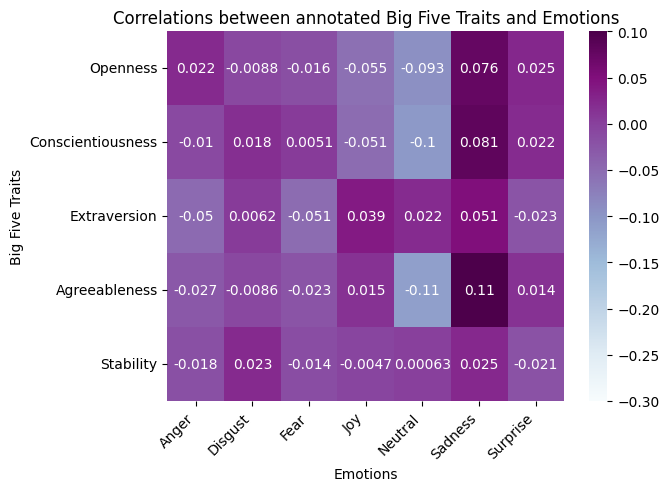

In [ ]:
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations = [
    [np.corrcoef(df_messages['Anger'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_openess'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_conscientiousness'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_extraversion'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_agreeableness'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_stability'])[0, 1] ],
]

correlation_array = np.array(correlations)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1)

ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between annotated Big Five Traits and Emotions')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()


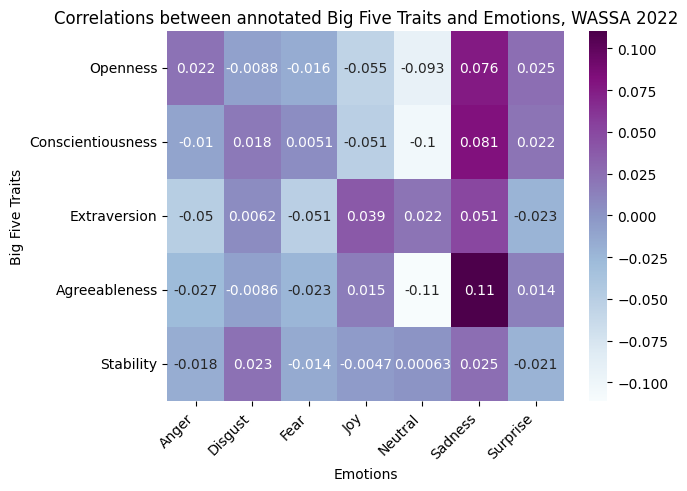

In [ ]:
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations = [
    [np.corrcoef(df_messages['Anger'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_openess'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_openess'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_conscientiousness'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_conscientiousness'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_extraversion'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_extraversion'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_agreeableness'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_agreeableness'])[0, 1] ],
    [np.corrcoef(df_messages['Anger'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Disgust'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Fear'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Joy'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Neutral'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Sadness'], df_messages['personality_stability'])[0, 1], np.corrcoef(df_messages['Surprise'], df_messages['personality_stability'])[0, 1] ],
]

correlation_array = np.array(correlations)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax)

ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between annotated Big Five Traits and Emotions, WASSA 2022')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations best predictions

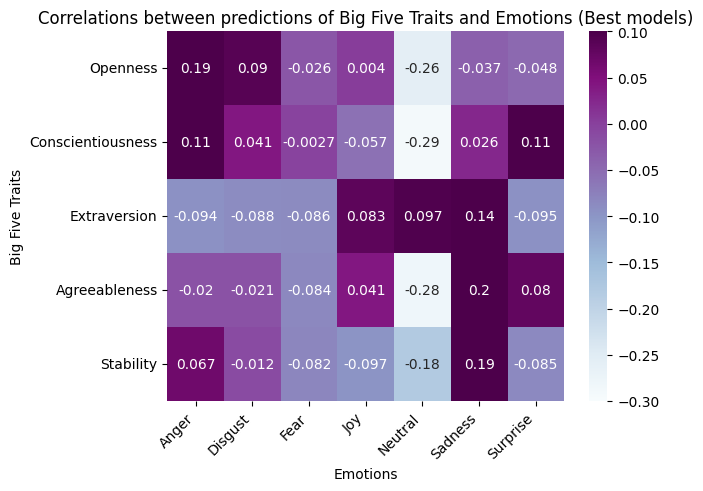

In [ ]:
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
correlations_best = [
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_BERT['Extraversion'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_BERT['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_best)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1)

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predictions of Big Five Traits and Emotions (Best models)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations from DistilBERT predictions

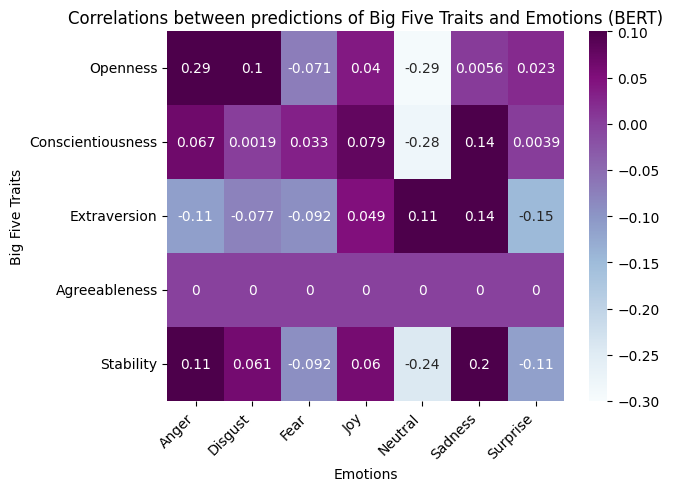

In [ ]:
df_preds_BERT = pd.read_csv('/content/drive/MyDrive/df_preds_BERT.csv')
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations_BERT = [
    [np.corrcoef(df_preds_BERT['Anger'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Disgust'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Fear'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Joy'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Neutral'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Sadness'], df_preds_BERT['Openess'])[0, 1], np.corrcoef(df_preds_BERT['Surprise'], df_preds_BERT['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_BERT['Anger'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Disgust'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Fear'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Joy'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Neutral'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Sadness'], df_preds_BERT['Conscientiousness'])[0, 1], np.corrcoef(df_preds_BERT['Surprise'], df_preds_BERT['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_BERT['Anger'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Disgust'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Fear'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Joy'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Neutral'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Sadness'], df_preds_BERT['Extraversion'])[0, 1], np.corrcoef(df_preds_BERT['Surprise'], df_preds_BERT['Extraversion'])[0, 1] ],
    [0,0,0,0,0,0,0,],
    [np.corrcoef(df_preds_BERT['Anger'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Disgust'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Fear'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Joy'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Neutral'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Sadness'], df_preds_BERT['Stability'])[0, 1], np.corrcoef(df_preds_BERT['Surprise'], df_preds_BERT['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_BERT)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1)

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predictions of Big Five Traits and Emotions (BERT)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations from RoBERTa predictions

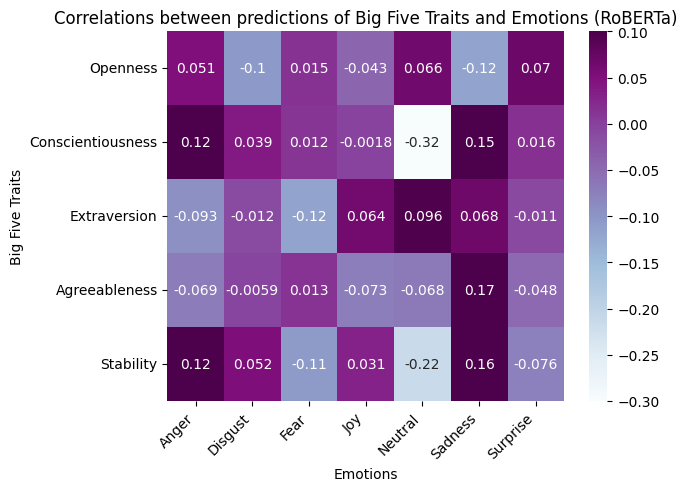

In [ ]:
df_preds_RoBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_RoBERTa.csv')
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations_RoBERTa = [
    [np.corrcoef(df_preds_RoBERTa['Anger'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Disgust'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Fear'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Joy'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Neutral'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Sadness'], df_preds_RoBERTa['Openess'])[0, 1], np.corrcoef(df_preds_RoBERTa['Surprise'], df_preds_RoBERTa['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_RoBERTa['Anger'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Disgust'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Fear'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Joy'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Neutral'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Sadness'], df_preds_RoBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Surprise'], df_preds_RoBERTa['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_RoBERTa['Anger'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Disgust'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Fear'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Joy'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Neutral'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Sadness'], df_preds_RoBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_RoBERTa['Surprise'], df_preds_RoBERTa['Extraversion'])[0, 1] ],
    [np.corrcoef(df_preds_RoBERTa['Anger'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Disgust'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Fear'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Joy'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Neutral'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Sadness'], df_preds_RoBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_RoBERTa['Surprise'], df_preds_RoBERTa['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_preds_RoBERTa['Anger'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Disgust'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Fear'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Joy'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Neutral'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Sadness'], df_preds_RoBERTa['Stability'])[0, 1], np.corrcoef(df_preds_RoBERTa['Surprise'], df_preds_RoBERTa['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_RoBERTa)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1 )

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predictions of Big Five Traits and Emotions (RoBERTa)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations from DeBERTa predictions

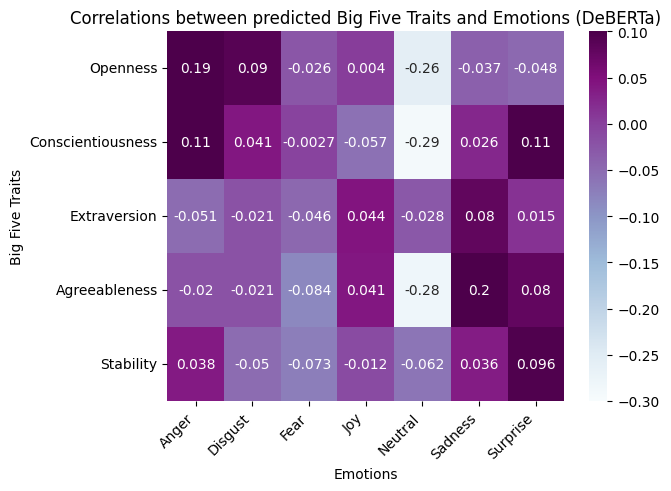

In [ ]:
df_preds_DeBERTa = pd.read_csv('/content/drive/MyDrive/df_preds_DeBERTa.csv')
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations_DeBERTa = [
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Extraversion'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_DeBERTa['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_DeBERTa['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_DeBERTa)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1)

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predicted Big Five Traits and Emotions (DeBERTa)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations from SVM predictions (traits) and DeBERTa (emotions)

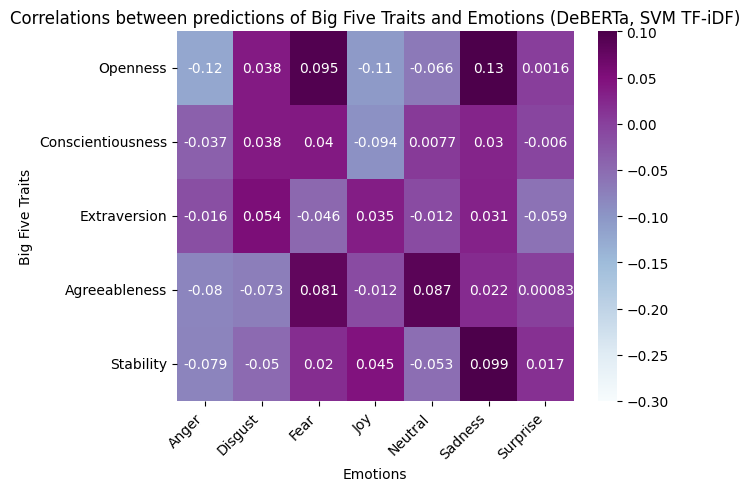

In [ ]:
df_preds_SVM_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_SVM_TFiDF.csv')
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations_SVM_TFiDF = [
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_SVM_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_SVM_TFiDF['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_SVM_TFiDF['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_SVM_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_SVM_TFiDF['Extraversion'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_SVM_TFiDF['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_SVM_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_SVM_TFiDF['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_SVM_TFiDF)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1 )

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predictions of Big Five Traits and Emotions (DeBERTa, SVM TF-iDF)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

###Correlations from Log. regression predictions (traits) and DeBERTa (emotions)

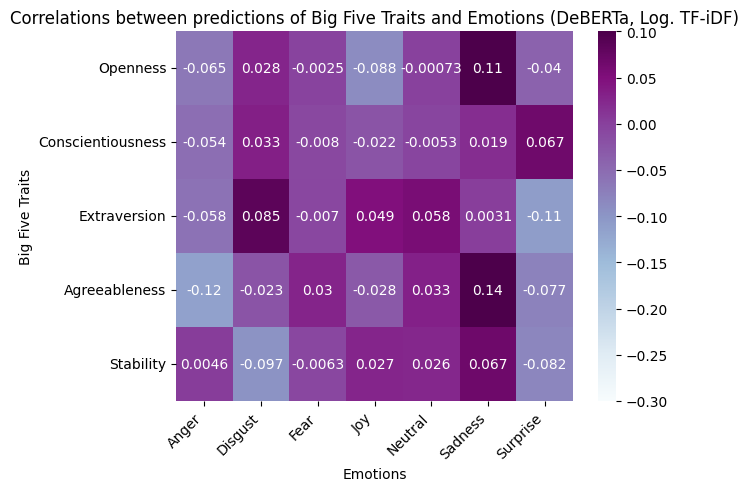

In [ ]:
df_preds_LOG_TFiDF = pd.read_csv('/content/drive/MyDrive/df_preds_LOG_TFiDF.csv')
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations_LOG_TFiDF = [
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_LOG_TFiDF['Openess'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_LOG_TFiDF['Openess'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_LOG_TFiDF['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_LOG_TFiDF['Extraversion'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_LOG_TFiDF['Extraversion'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_LOG_TFiDF['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_preds_DeBERTa['Anger'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Disgust'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Fear'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Joy'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Neutral'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Sadness'], df_preds_LOG_TFiDF['Stability'])[0, 1], np.corrcoef(df_preds_DeBERTa['Surprise'], df_preds_LOG_TFiDF['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations_LOG_TFiDF)

fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax, vmin=-0.3, vmax=0.1 )

ax.set_xticks(np.arange(len(emotions)) + 0.5)
ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticks(np.arange(len(big_five_traits)) + 0.5)
ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between predictions of Big Five Traits and Emotions (DeBERTa, Log. TF-iDF)')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()

##Comparison of correlations

###Comparison of correlation best models

In [ ]:
#Correlations
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_best)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

#Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.7251355678584985
Mean Absolute Error (MAE): 0.0786808040669988
Root Mean Squared Error (RMSE): 0.09455191014927479
P-Value: [0.1875 1.     0.0625 0.8125 0.125  0.625  1.    ]


###Comparison of correlations BERT

In [ ]:
#Correlations
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_BERT)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

#Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.5035712391857611
Mean Absolute Error (MAE): 0.0833947775336148
Root Mean Squared Error (RMSE): 0.10579129373765683
P-Value: [0.1875 0.8125 0.3125 0.1875 0.3125 0.8125 0.0625]


###Comparison of correlations RoBERTa

In [ ]:
#Correlations
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_RoBERTa)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

# Perform the Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.5079509290611282
Mean Absolute Error (MAE): 0.06722802019284796
Root Mean Squared Error (RMSE): 0.08903556035954044
P-Value: [0.625  1.     0.8125 0.625  0.8125 0.625  0.625 ]


###Comparison of correlations DeBERTa

In [ ]:
#Correlations
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_DeBERTa)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

#Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.7085285961370565
Mean Absolute Error (MAE): 0.061409523224427734
Root Mean Squared Error (RMSE): 0.08090245339014644
P-Value: [0.125  1.     0.125  0.625  0.0625 1.     0.3125]


###Comparison of correlations SVM

In [ ]:
#Correlation
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_SVM_TFiDF)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

# Perform the Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.2676071073456028
Mean Absolute Error (MAE): 0.05391586699934324
Root Mean Squared Error (RMSE): 0.06697312648853114
P-Value: [0.1875 0.8125 0.0625 0.4375 0.625  1.     0.625 ]


###Comparison of correlations Logistic Regression

In [ ]:
#Correlation
original_correlations = np.array(correlations)
predicted_correlations= np.array(correlations_LOG_TFiDF)

original_flattened = original_correlations.flatten()
predicted_flattened = predicted_correlations.flatten()

correlation_coef, _ = pearsonr(original_flattened, predicted_flattened)

#Mean absolute error (MAE)
mae = np.mean(np.abs(original_flattened - predicted_flattened))

#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((original_flattened - predicted_flattened) ** 2))

# Perform the Wilcoxon signed-rank test
_, p_value = stats.wilcoxon(original_correlations, predicted_correlations)

#Print
print("Comparison of correlations")
print("Correlation Coefficient:", correlation_coef)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"P-Value: {p_value}")

Comparison of correlations
Correlation Coefficient: 0.3924774913479601
Mean Absolute Error (MAE): 0.0500557963546185
Root Mean Squared Error (RMSE): 0.06017756427327357
P-Value: [0.1875 0.8125 0.1875 0.8125 0.0625 0.8125 0.125 ]
